# Import Libraries

In [188]:
# import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
                        
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('Set2')
# sns.set_palette('Paired')

# import libraries required for data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# import required for model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_curve, RocCurveDisplay, accuracy_score, auc

# Reading the Data

In [189]:
# import dataset

main_df = pd.read_csv('Data.csv')
main_df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [190]:
# set pandas option to show all columns

pd.set_option('display.max_columns', None)
#pd.options.display.max_columns = 25 

# make a copy of dataset 

df = main_df.copy()
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


# Data Cleaning and Exploratory Data Analysis

### Desciptive Analysis

In [191]:
# rows and columns in dataset
df.shape

(12684, 25)

In [192]:
# info about the variables in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

    Target variable : 'Accept(Y/N?)'    # whether customer accepted the coupon or not

    Independent Variable: 

     - coupon related : 'coupon'             # type of coupon
                       'expiration'          # validity of coupon
                       'toCoupon_GEQ5min'    # driving time greater than 5min for restaurant/cafe/bar to use 
                                               coupon or not
                       'toCoupon_GEQ15min'   # driving time greater than 15min for restaurant/cafe/bar to use 
                                               coupon or not
                       'toCoupon_GEQ25min'   # driving time greater than 25min for restaurant/cafe/bar to use 
                                               coupon or not
                       
    - Cutomer related : 'gender'                # Gender of Customer 
                        'age'                   # User's age 
                        'maritalStatus'         # user's marriage staus 
                        'has_children'          # whether cutomer has children or not
                        'education'             # highest education of user's
                        'occupation'            # user's occupation
                        'income'                # user's income
                        'car'                   # Description of vehicle driven by the user
                        'Bar'                   # count of user's visit to bar every month 
                        'CoffeeHouse'           # count of user's visit to coffe house every month 
                        'CarryAway'             # count of take away food by user every month 
                        'RestaurantLessThan20'  # user's visits to restaurants with avg expense of 
                                                  20/person every month 
                        'Restaurant20To50'      # user's visits to restaurants with avg expense of 
                                                  20 to 50/person every month 
           

    - Driving related : 'destination'    # where is cutomer driving to
                        'passanger'       # with whom customer is travelling
                        'weather'         # type of weather 
                        'temperature'     # weather temperature in fahrenheite
                        'direction_same'  # customer driving in same direction of restaurant/cafe/bar or not
                        'direction_opp'   # customer driving in opposite direction of restaurant/cafe/bar or not


* Data has 24 features and 1 categorical target variable. Some values are missing.

In [193]:
# satatistical measures of numerical type features in dataset

df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


* 'toCoupon_GEQ5min' feature has zero deviation, it has same value 1 for every record. It means driving time is greater than 5min to reach the restaurant/cafe/take away/bar.

drop this feature.

In [194]:
# satatistical measures of object type features in dataset

df.describe(include='object')

,destination,passanger,weather,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


In [195]:
# unique values in each features 
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Accept(Y/N?)             2
dtype: int64

Only 'occuptation' feature has 25 uniques values. All other features have less unique values. We can treat all features as categorical and later on encoding stage convert into numerical.

In [196]:
# print unique values in each feature

print('Feature   :   Values')
for col in df.columns:
    print(f'{col} : {list(df[col].unique())}')

Feature   :   Values
destination : ['No Urgent Place', 'Home', 'Work']
passanger : ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
weather : ['Sunny', 'Rainy', 'Snowy']
temperature : [55, 80, 30]
coupon : ['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
expiration : ['1d', '2h']
gender : ['Female', 'Male']
age : ['21', '46', '26', '31', '41', '50plus', '36', 'below21']
maritalStatus : ['Unmarried partner', 'Single', 'Married partner', 'Divorced', 'Widowed']
has_children : [1, 0]
education : ['Some college - no degree', 'Bachelors degree', 'Associates degree', 'High School Graduate', 'Graduate degree (Masters or Doctorate)', 'Some High School']
occupation : ['Unemployed', 'Architecture & Engineering', 'Student', 'Education&Training&Library', 'Healthcare Support', 'Healthcare Practitioners & Technical', 'Sales & Related', 'Management', 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical', 'Life Physical Social Science', 'Personal Care 

 - target variable has only two class [ 1 , 0 ].
 - 'toCoupon_GEQ5min' feature has only one value.
 - 'age', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50', these features have nuemrical values but in range. So later on we will replace range value with mean value of range.

 

<Axes: >

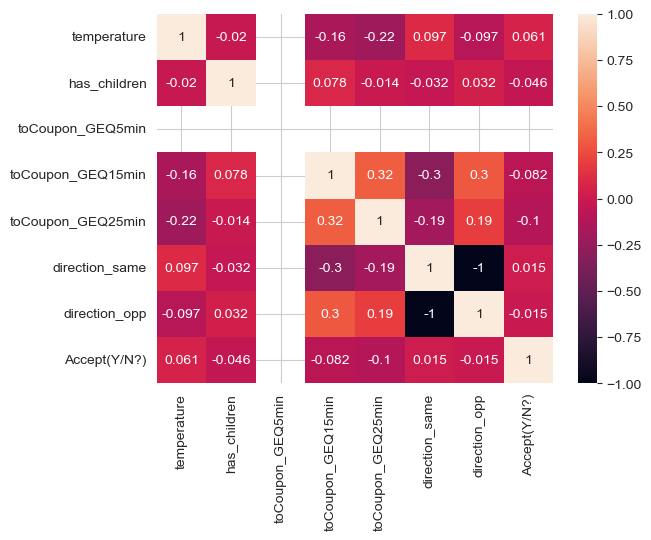

In [197]:
# correlation matrix
sns.heatmap(df.corr(), annot=True)

* feature 'direction_opp' has perfect negative corrleation with 'direction_same'.
* 'toCoupon_GEQ5min' having null value because it has single value.

remove 'direction_opp' feature

### Duplicated records

In [198]:
# check if we have duplicated data or not
print(f'Duplicated Values : {df.duplicated().sum()} ({round(df.duplicated().sum()/len(df) * 100,2)}%)')

Duplicated Values : 291 (2.29%)


In [199]:
#check how many duplicated value in Positive (1) target class

df[df['Accept(Y/N?)']==1].duplicated().sum()

198

In [200]:
# remove duplicated rows
dupliated_data = df[df.duplicated(keep='last')]

df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [201]:
# shape after removing duplicated values
df.shape

(12393, 25)

### Missing values

<Axes: >

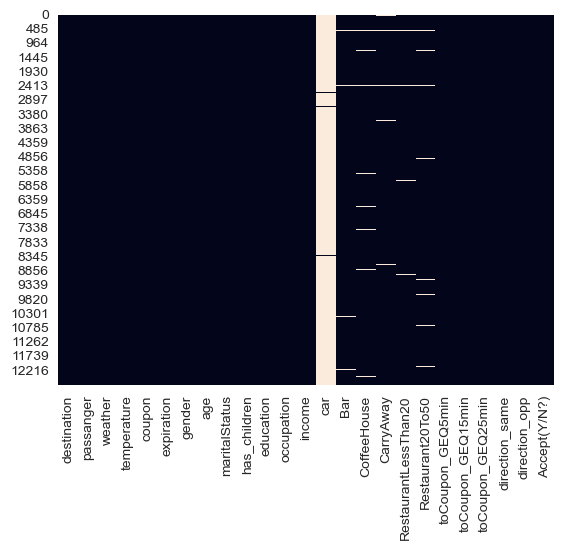

In [202]:
# heatmap to see if data has missing values.
sns.heatmap(df.isnull(), annot=False, cbar=False)

In [203]:
# check how much % values are missing

print('Feature        Missing value%')
print(f'{round(df.isnull().sum()[df.isnull().any()] / len(df) * 100,2)}%')

Feature        Missing value%
car                     99.14
Bar                      0.86
CoffeeHouse              1.73
CarryAway                1.19
RestaurantLessThan20     1.03
Restaurant20To50         1.52
dtype: float64%


- Feature 'car' has 99% value missing. Drop this feature.
- we will treat other missing value during data preprocessing.

In [204]:
#car data analaysis

# car_data  = pd.DataFrame(df['car'].value_counts().values, index=df['car'].value_counts().index, columns=['Total'])


index = df.groupby('car')['Accept(Y/N?)'].count().index
data = df.groupby('car')['Accept(Y/N?)'].count().values

car_data = pd.DataFrame(data, index=index, columns=['Total'])
car_data['Toatal %'] = round(car_data['Total'] /len(df) * 100,2)
car_data['Accepted'] = df[df['Accept(Y/N?)']==1].groupby('car')['Accept(Y/N?)'].count()
car_data['Accepted %'] = round(car_data['Accepted'] / car_data['Total'] *100, 2)
car_data['Rejected'] = car_data['Total'] - car_data['Accepted']
car_data['Rejected %'] = round(car_data['Rejected'] / car_data['Total'] *100, 2)

car_data

,Total,Toatal %,Accepted,Accepted %,Rejected,Rejected %
car,,,,,,
Car that is too old to install Onstar :D,20,0.16,16,80.00,4,20.00
Mazda5,22,0.18,16,72.73,6,27.27
Scooter and motorcycle,21,0.17,11,52.38,10,47.62
crossover,21,0.17,8,38.10,13,61.90
do not drive,22,0.18,10,45.45,12,54.55


### Remove redundant features

In [205]:
# remove the columns 'toCoupon_GEQ5min', 'direction_opp' and 'car'

df.drop(labels=['toCoupon_GEQ5min', 'direction_opp', 'car'], axis=1, inplace=True)
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'Accept(Y/N?)'],
      dtype='object')

### Univariate Analysis

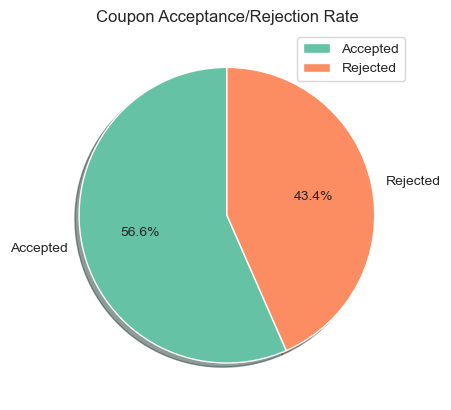

In [206]:
# Distribution of Dependent variable

plt.pie(x=df['Accept(Y/N?)'].value_counts(), labels=['Accepted', 'Rejected'], autopct='%.1f%%', startangle=90, shadow=True)
plt.title('Coupon Acceptance/Rejection Rate')
plt.legend()
plt.show()

- Customer have high coupon acceptance rate which is good. 

In [73]:
# # function to create count plot wrt coupon acceptance
# def univariate_analysis(col):
#     plt.figure(figsize=(5,4))
#     ax1 = sns.countplot(data=df,x=col, hue='Accept(Y/N?)', hue_order=[1,0], edgecolor='black')

#     for p in ax1.patches:
#         x = p.get_x()+ p.get_width()/2
#         y = p.get_height() 
#         ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (x,y), ha='center', va='bottom')
#     plt.title(f'{col} wise coupon Acceptance')
#     plt.legend(labels=['Accepted','Rejected'])
#     plt.show()
    
# univariate_analysis('destination')

In [74]:
# function to create stacked count plot wrt coupon acceptanc

def univariate_plot(col):
#     plt.figure(figsize=(5,4))
    # top plot with all data
    ax = sns.countplot(data=df, x=col, color='cyan', order=df[col].value_counts().index)

    # bottom plot with only accepted data
    ax = sns.countplot(data=df[df['Accept(Y/N?)']==1], x=col, color='lightgreen', order=df[col].value_counts().index)

    # print label for top plot
    for p in ax.containers[0]:
            x = p.get_x()+ p.get_width()/2
            y = p.get_height()
            ax.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (x,y), ha='center',va='baseline')

    # print label for bottom plot
    for i, p in enumerate(ax.containers[1]):
            x = p.get_x()+ p.get_width()/2
            y = p.get_height() - p.get_height()/2
            ax.annotate(f'{round(p.get_height()/ ax.containers[0][i].get_height() *100,1)}%', (x,y), ha='center', va='center')
#           ax2.annotate(f'{p.get_height()}\n({round(p.get_height()/ df[col].value_counts()[i] *100,1)}%)', (x,y), ha='center', va='center')

    plt.title(f'{col} wise coupon Acceptance')
    plt.legend(labels=['Total','Accepted'])
    if df[col].apply(str).apply(len).max() > 15:
        plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()

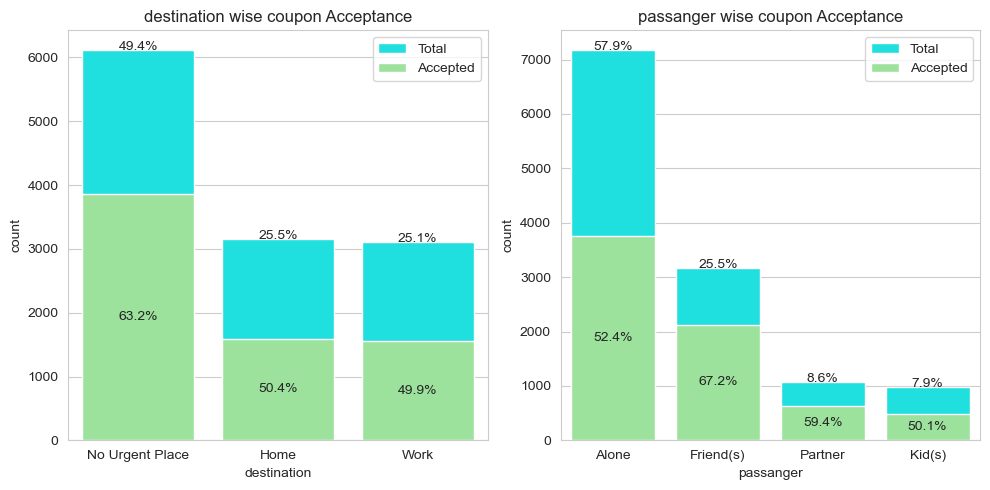

In [75]:
# destination and passanger analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
univariate_plot('destination')
plt.subplot(1,2,2)
univariate_plot('passanger')
plt.tight_layout()
plt.show()

__Observations:__
* Majority of people travelling to no urgent place.
* user with destination no urgent place have high coupon acceptance rate.
* user travelling to Work or Home have same acceptance ratio.
* Most of the time user travelling alone.
* when user travelling with friends, they have high acceptance rate.
* user who go out with kids has lowest acceptance rate.

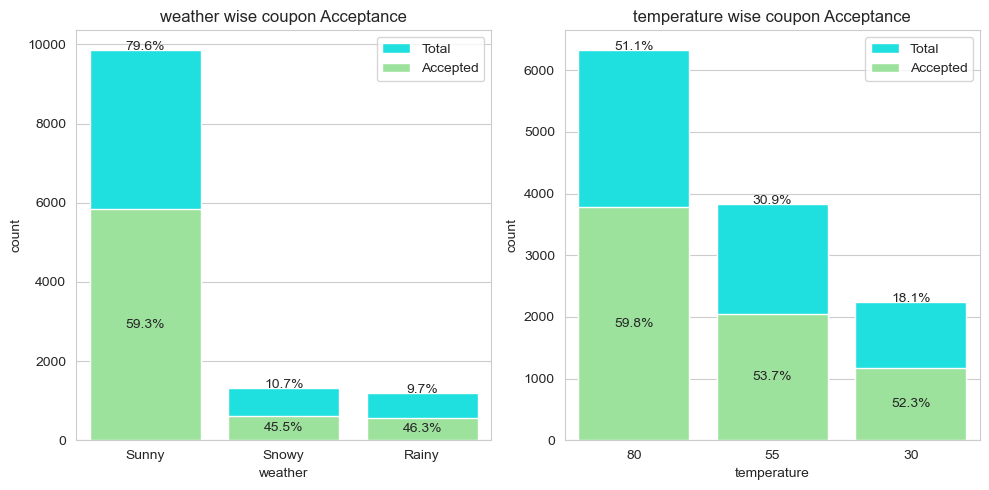

In [76]:
# weather and temperature analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
univariate_plot('weather')
plt.subplot(1,2,2)
univariate_plot('temperature')
plt.tight_layout()
plt.show()

__Observations:__
* most of the user travelling on Sunny weather and have high coupon acceptance rate 59.3%.
* most of the time users go out when the temperature is 80 F and accepts most of the coupon.
* people are less travelling on rainy day and cold days.


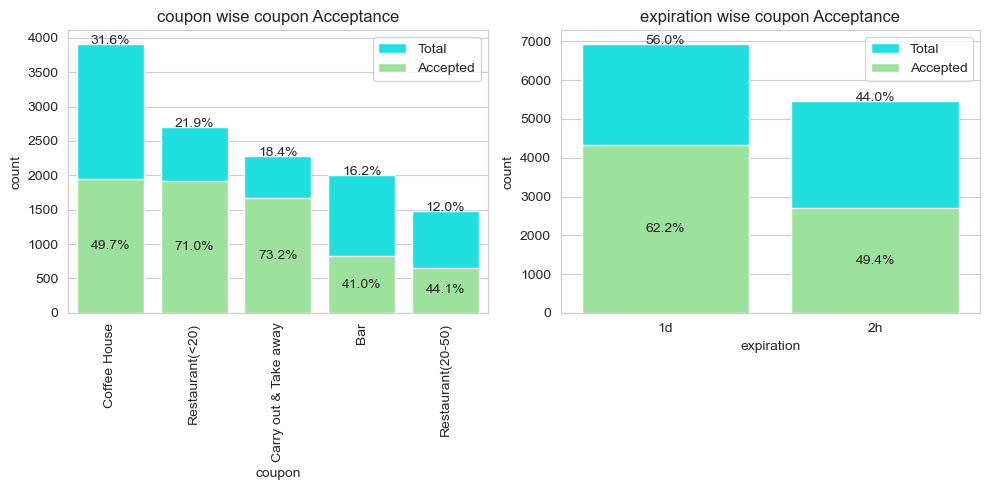

In [77]:
# coupon and expiration analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
univariate_plot('coupon')
plt.subplot(1,2,2)
univariate_plot('expiration')
plt.tight_layout()
plt.show()

__Observations:__
*  people are getting high number of coffe house coupons but their acceptance rate is average.
* Take away and Restaurant<20 type of coupons have the highest acceptance rate.
* Bar related coupons have least acceptance rate.
* people are more accepting coupons with 1day expiry.
* coupons with 2hour expiry only have 50% chances.


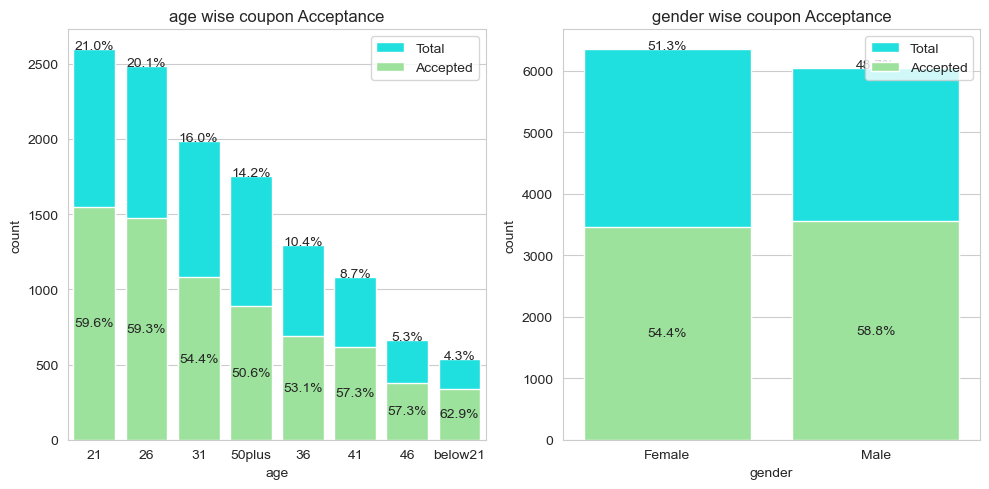

In [78]:
# age and gender analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
univariate_plot('age')
plt.subplot(1,2,2)
univariate_plot('gender')
plt.tight_layout()
plt.show()

__Observations:__
* 56% of the travellers are in 21 to 31 age group.
* user with age below 21 have high coupon acceptance ratio.
* people of age above 50 have 50% chances of accepting a coupon.
* Male travellers have slightly higher chances of accepting a coupon than female traveller.

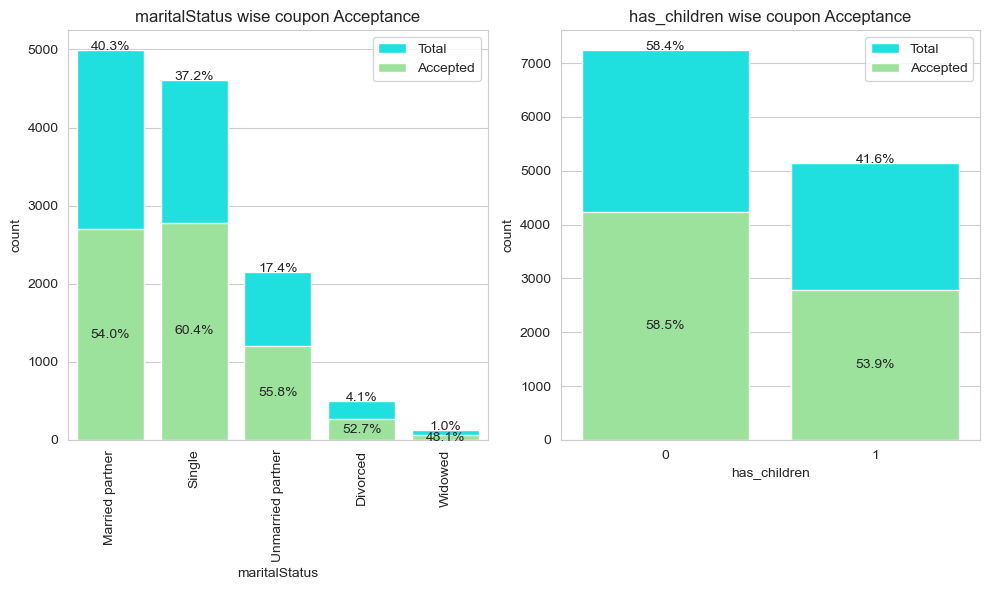

In [79]:
# maritalStatus and has_children analysis
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
univariate_plot('maritalStatus')
plt.subplot(1,2,2)
univariate_plot('has_children')
plt.tight_layout()
plt.show()

__Observations:__
* most users are single or married.
* Single user have high acceptance ratio.
* most users dont have children and have high acceptance ratio.


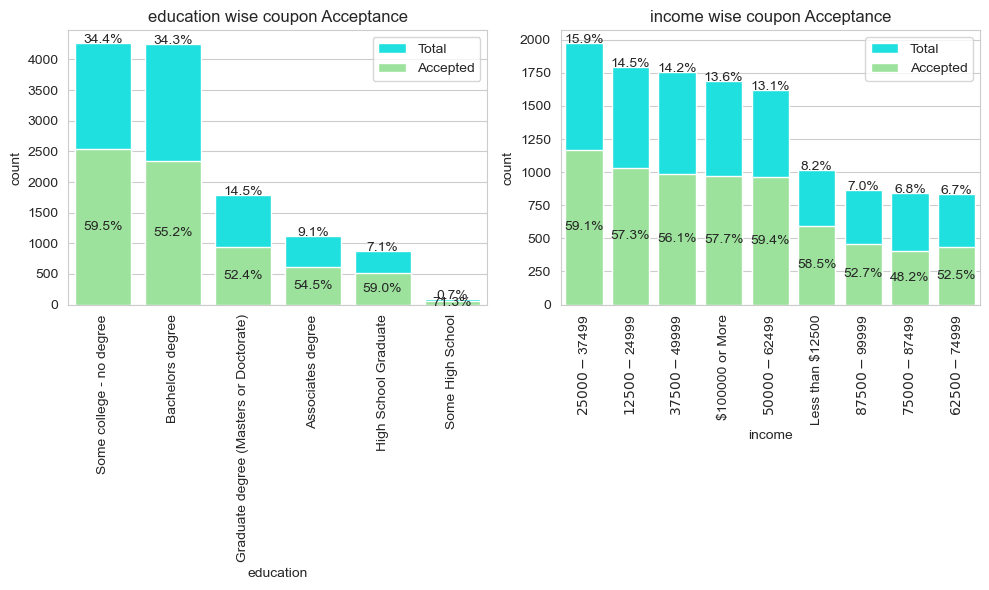

In [80]:
# education and income analysis
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
univariate_plot('education')
plt.subplot(1,2,2)
univariate_plot('income')
plt.tight_layout()
plt.show()

__Observations:__
* most user have Bachelors Degree or Some college -No degree.
* very few user have some high school education but they have highest acceptance ratio.
* users with Master or Doctorate degree have least acceptance ratio.
* 45% users income is in  between 25000-49999.
* people with low income or high income accepts more coupons.
* people with medium income are  rejecting most of coupons.

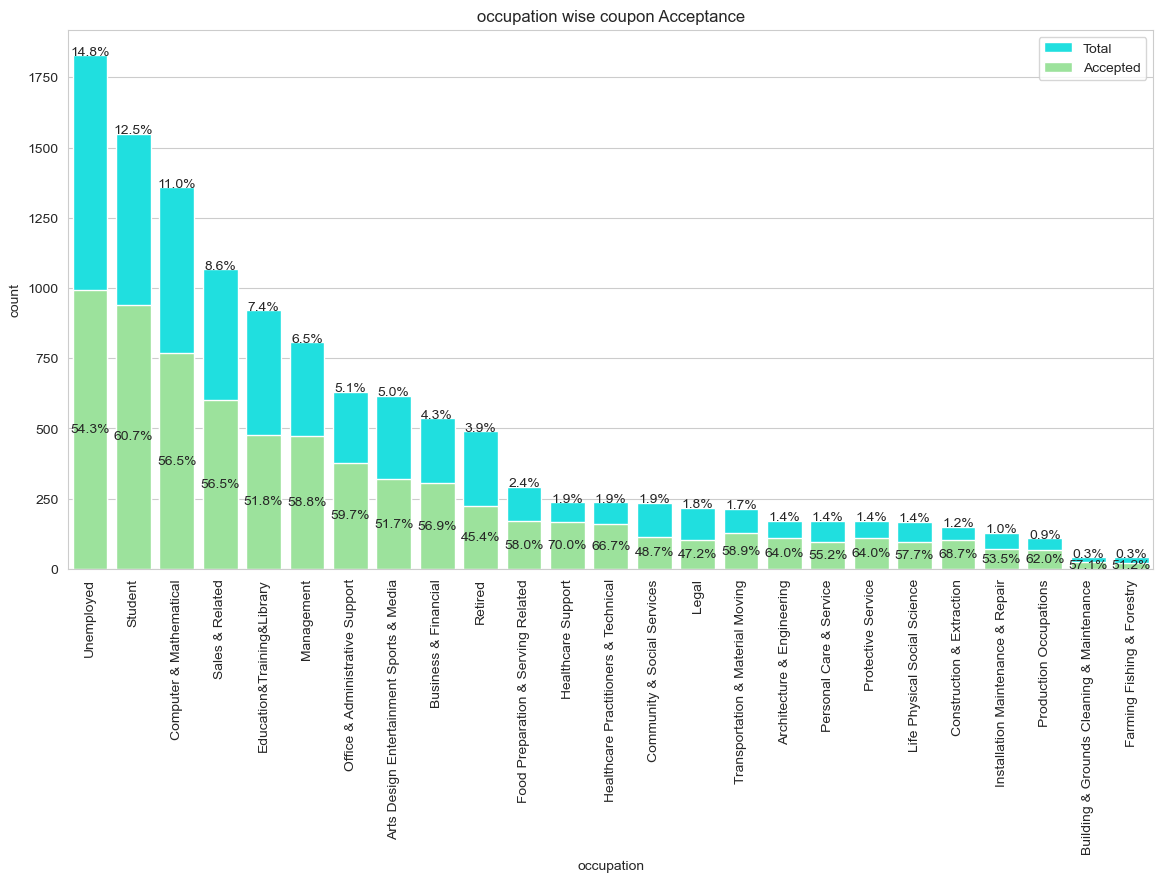

In [81]:
# occupation and temperature analysis
plt.figure(figsize=(14,7))
univariate_plot('occupation')
plt.show()

__Observations:__
* most users in this data are students or unemployed.
* students have high acceptance ration than unemployed person.
* suer who works in Healthcare support and construction & extraction have highest acceptance ratio.
* retired user have least acceptance ratio.

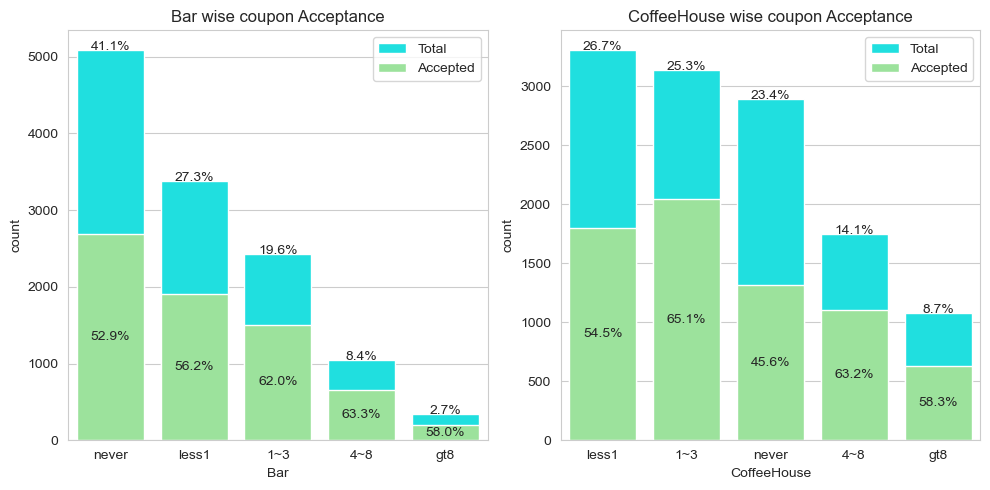

In [82]:
# Bar and CoffeeHouse analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
univariate_plot('Bar')
plt.subplot(1,2,2)
univariate_plot('CoffeeHouse')
plt.tight_layout()
plt.show()

__Observations:__
* most users in this data have never visited Bar and have less chance of accepting a coupon.
* very few user vists bar more than 8 time in a month.
* people who visits bar 1-3 or 4-8 time in month have high acceptance rate.
* most user in this data visits coffe house less than 1 time a month on avergae.
* people who never visited coffe house have least acceptance ratio.
* people who visits coffe house 1-3 or 4-8 time in month have high acceptance rate.

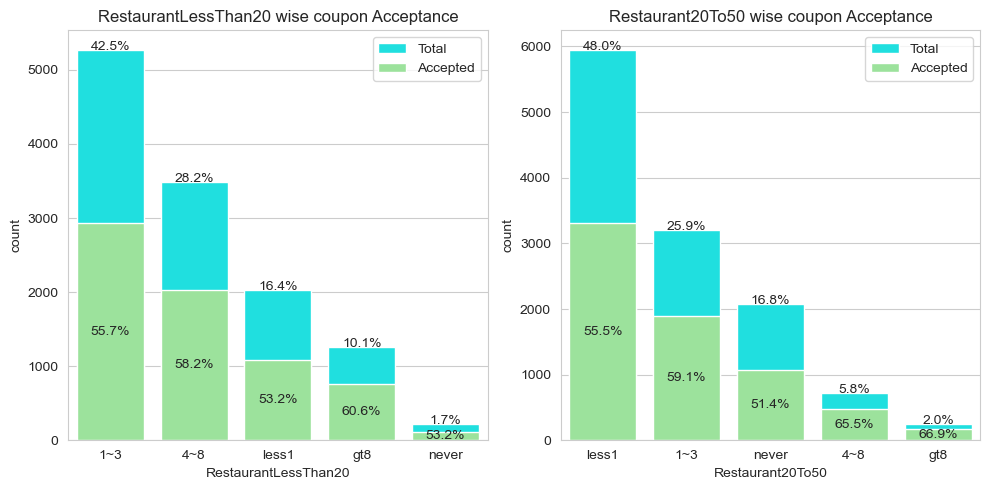

In [83]:
# RestaurantLessThan20 and Restaurant20To50 analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
univariate_plot('RestaurantLessThan20')
plt.subplot(1,2,2)
univariate_plot('Restaurant20To50')
plt.tight_layout()
plt.show()

__Observations:__
* most users, visits ReastaurantLessThan20 1-3 time in a month on average.
* very few users have never visited ReastaurantLessThan20.
* people who visits ReastaurantLessThan20 more than 9 times in month have high acceptance rate.
* most user in this data visits Reastaurant20to50 less than 1 time a month on avergae.
* people who visits Reastaurant20to50 more than 8 times highest acceptance ratio.
* people who never visited Reastaurant20to50 have least acceptance rate.

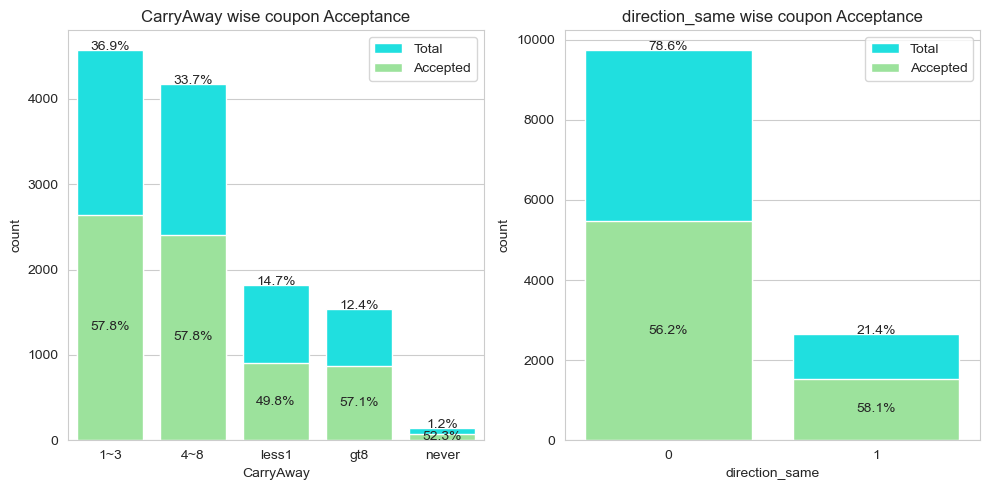

In [84]:
# CarryAway and direction_same analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
univariate_plot('CarryAway')
plt.subplot(1,2,2)
univariate_plot('direction_same')
plt.tight_layout()
plt.show()

__Observations:__
* most of travellers visited 1-3 times CarryAway in a month.
* very few users never visites carryAway.
* 78% traveller are travelling in opposite direction.
* coupon acceptance ratio is almost same irrespective of direction. direction has no effect on coupon acceptance.

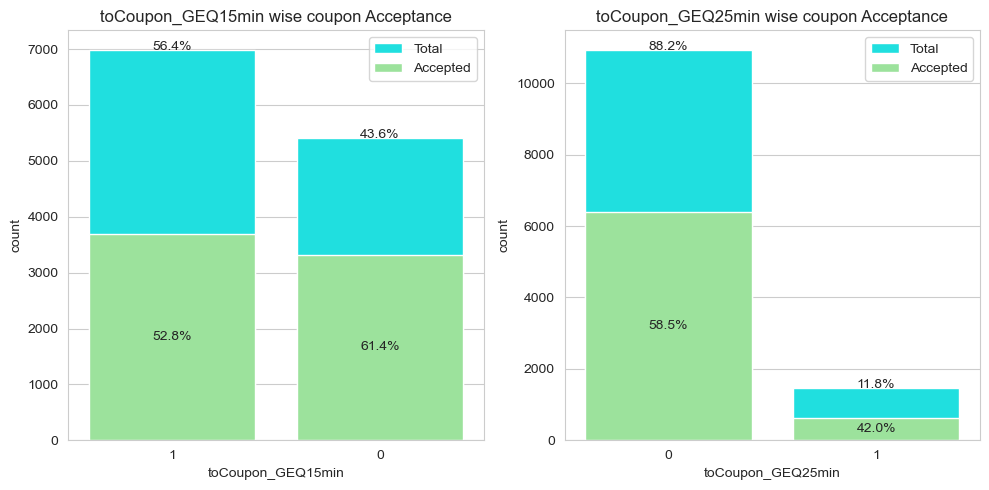

In [85]:
# toCoupon_GEQ15min and toCoupon_GEQ25min analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
univariate_plot('toCoupon_GEQ15min')
plt.subplot(1,2,2)
univariate_plot('toCoupon_GEQ25min')
plt.tight_layout()
plt.show()

__Observations:__
* 56% copuons outlet is more than 15min dsitance from traveller.
* if coupon outlet is within 15min from traverller, chances of accepting are higher.
* 88% coupons offeres have a outlet within 25min distance from traveller.
* if coupon outlet is within 25min distance, we have high chances that traveller will accept the coupon.

### Bi-variate Analysis


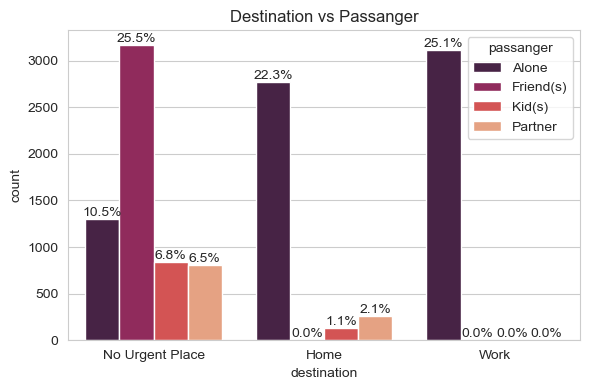

In [86]:
# Destination vs Passanger
plt.figure(figsize=(6,4))
ax1 = sns.countplot(data=df, x='destination', hue='passanger', palette='rocket')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Destination vs Passanger')
plt.tight_layout()
plt.show()

__Observations:__
* most of the user are travelling Alone either to work or home.
* 25% travellers are going out with friend to no urgent place.
* with friend, user only go to no urgent place.
* very less travellers are travelling with kids.

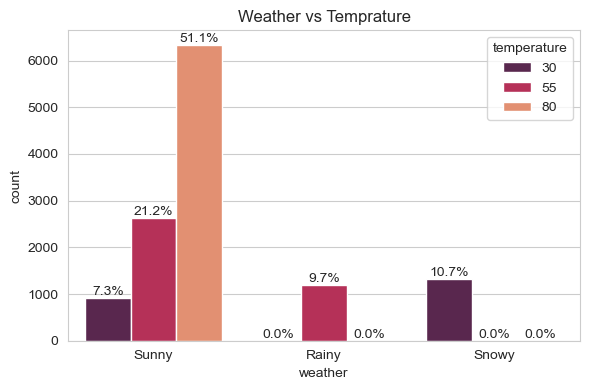

In [87]:
# Weather vs Temprature
plt.figure(figsize=(6,4))
ax1 = sns.countplot(data=df,x='weather', hue='temperature', palette='rocket')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Weather vs Temprature')
plt.tight_layout()
plt.show()

__Observations:__
* traveller prefer sunny weather for traveling.
* on Snowy or rainy weather tempearature is less than 80F.

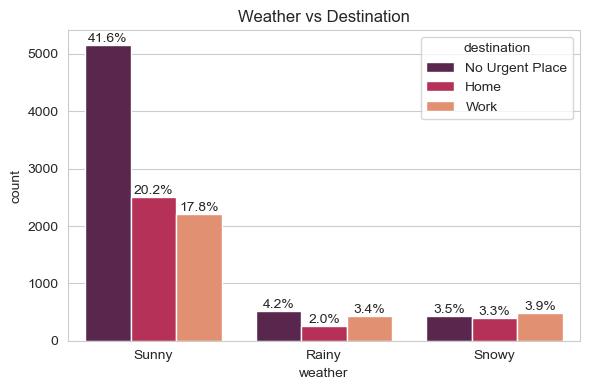

In [88]:
# Weather vs Destination
plt.figure(figsize=(6,4))
ax1 = sns.countplot(data=df,x='weather', hue='destination', palette='rocket')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Weather vs Destination')
plt.tight_layout()
plt.show()

__Observations:__
* 40% travellers are travelling to no urgent place on sunny weather.
* on rainy or snowy weathers very less people traveling to no urgent place.

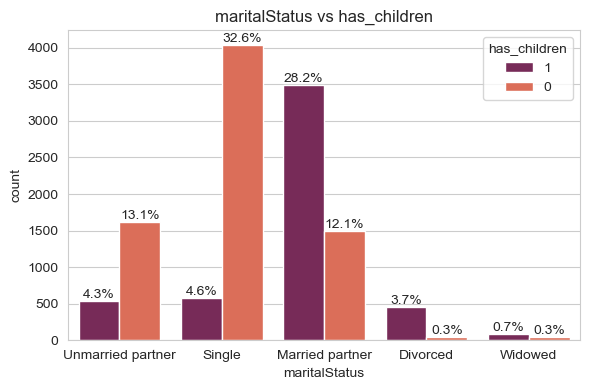

In [89]:
# martial Status vs has child
plt.figure(figsize=(6,4))
ax1 = sns.countplot(data=df,x='maritalStatus', hue='has_children', hue_order=[1,0], palette='rocket')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('maritalStatus vs has_children')
plt.tight_layout()
plt.show()

__Observations:__
* 32% traveller are single annd without child.
* Moslty married and divorced users have child.
* 4.6% user are single but have child.

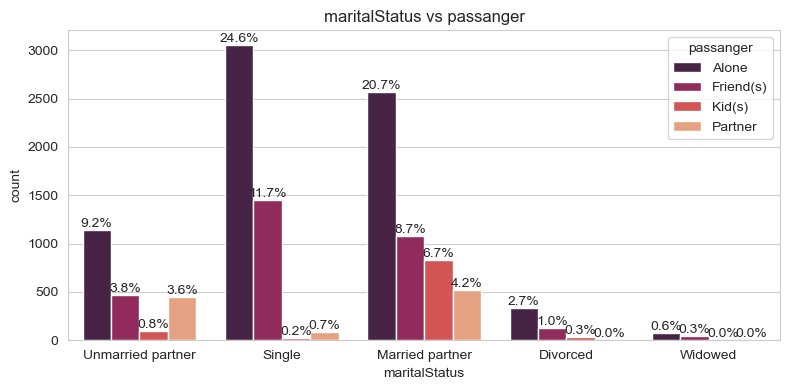

In [90]:
# martial Status vs passanger
plt.figure(figsize=(8,4))
ax1 = sns.countplot(data=df,x='maritalStatus', hue='passanger', palette='rocket')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('maritalStatus vs passanger')
plt.tight_layout()
plt.show()

__Observations:__
* single user always travel alone or with friends.
* only married users are travelling with kids.

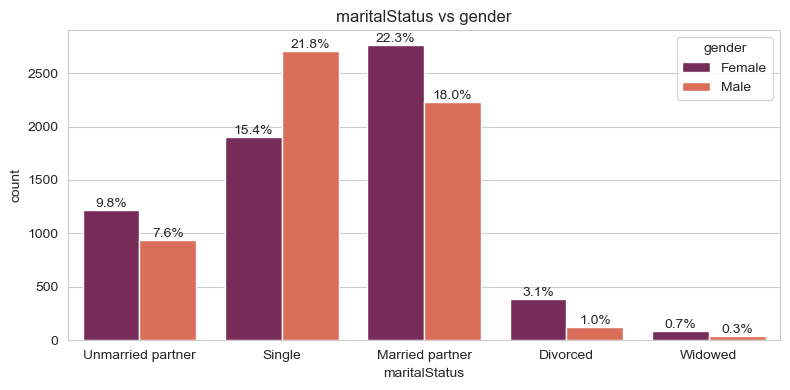

In [91]:
# martial Status vs gender
plt.figure(figsize=(8,4))
ax1 = sns.countplot(data=df,x='maritalStatus', hue='gender', palette='rocket')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('maritalStatus vs gender')
plt.tight_layout()
plt.show()

__Observations:__
* most of single users are male.
* most of married users are female.
* divorced female are 3times more than divorced male.


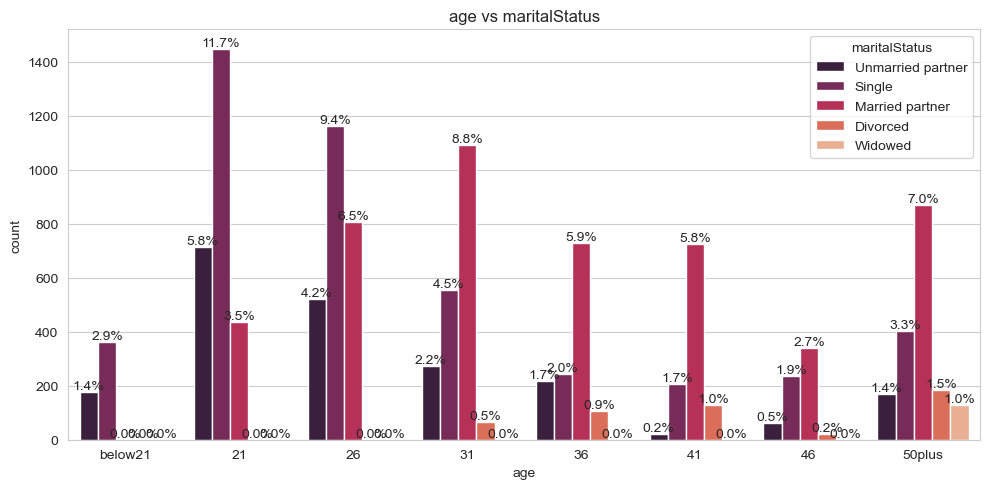

In [92]:
# martial Status vs age
plt.figure(figsize=(10,5))
ax1 = sns.countplot(data=df,x='age', hue='maritalStatus', palette='rocket',order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('age vs maritalStatus')
plt.tight_layout()
plt.show()

__Observations:__
* below21, 21, 26 age users most of single or have an unmarried partner.
* 31, 36, 41, 46, 50plus age users most of have Married partner.
* All Widowed users have 50plus age.
* Maximum Divorced users have 50plus age.
* All Divorced users have an age above 31.

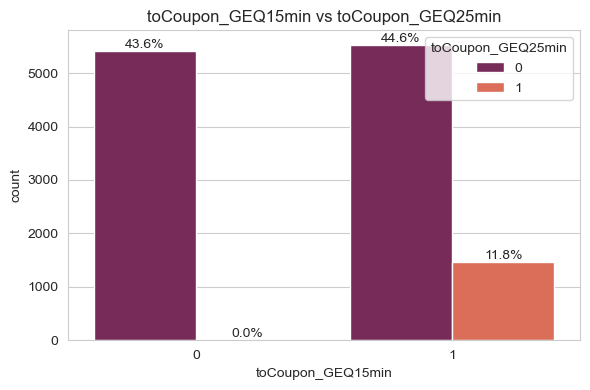

In [93]:
# toCoupon_GEQ15min vs toCoupon_GEQ25min
plt.figure(figsize=(6,4))
ax1 = sns.countplot(data=df,x='toCoupon_GEQ15min', hue='toCoupon_GEQ25min', palette='rocket')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('toCoupon_GEQ15min vs toCoupon_GEQ25min')
plt.tight_layout()
plt.show()

__Observations:__
0 : outlet within time limit
1 : outlet not in time limit
* if there is outlet within 15min distance, same is true for 25min time limit.
* only 11% times outlet distance is 25min.
* 43% outlets are within 15min reach.
* 44% outleta are in 25min reach 

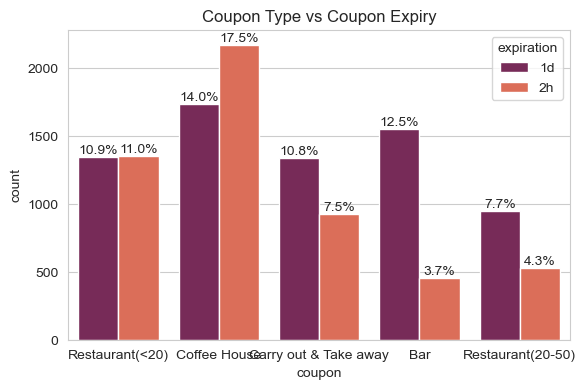

In [94]:
# Coupon type vs expiration
plt.figure(figsize=(6,4))
ax1 = sns.countplot(data=df,x='coupon', hue='expiration', palette='rocket')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Coupon Type vs Coupon Expiry')
plt.tight_layout()
plt.show()

__Observations:__
* most of coffe bouse coupons have 2h expiry.
* TakeAway, Bar and fancy Restaurant have most of 1day expiry coupon.
* Restaurant<20 have euqal no. of coupons.

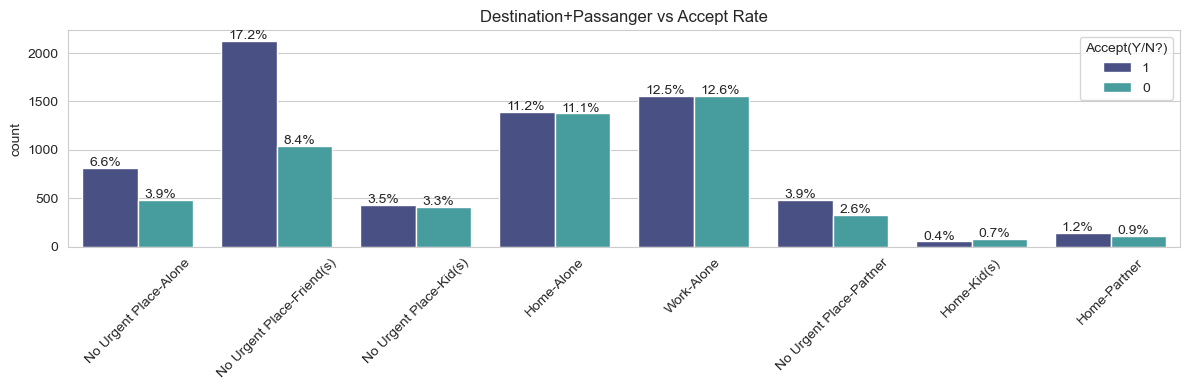

In [95]:
df1 = df['destination'] +'-' + df['passanger'] 

plt.figure(figsize=(12,4))
ax1 = sns.countplot(data=df,x=df1, hue='Accept(Y/N?)', hue_order=[1,0], palette='mako')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x()+0.05, p.get_height()+20))
plt.title('Destination+Passanger vs Accept Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


__Observations:__
* user travelling to no urgent palce with friends accepts majority of coupon.
* when user travelling alone to home or work, chances of coupon acceptance hare 50%.


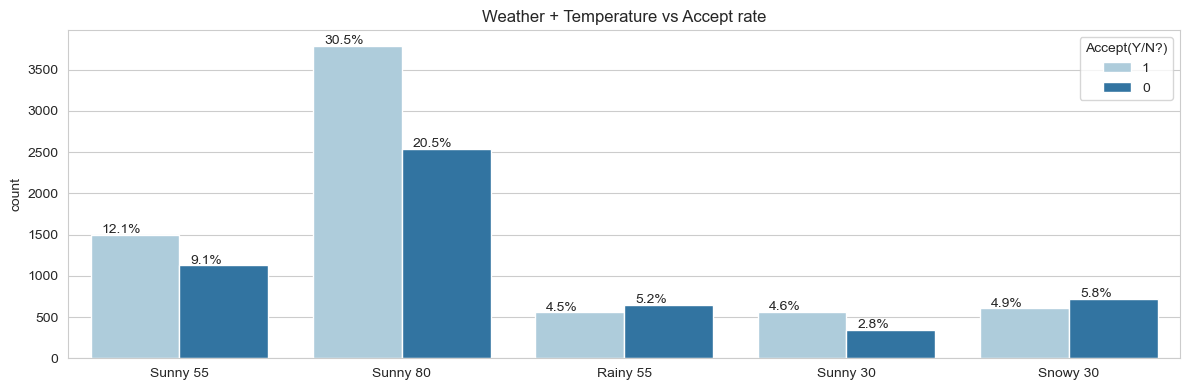

In [96]:
df1 = df['weather'] +' ' + df['temperature'].apply(str)

plt.figure(figsize=(12,4))
ax1 = sns.countplot(data=df,x=df1, hue='Accept(Y/N?)', hue_order=[1,0], palette='Paired')
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x()+0.05, p.get_height()+20))
plt.title('Weather + Temperature vs Accept rate')
plt.tight_layout()
plt.show()

__Observations:__
* when weather is sunny 80F and sunny 55F chances of coupon accepting are high.
* snowy and rainy day very less coupon acceptance ratio.

### Multivariate Analysis

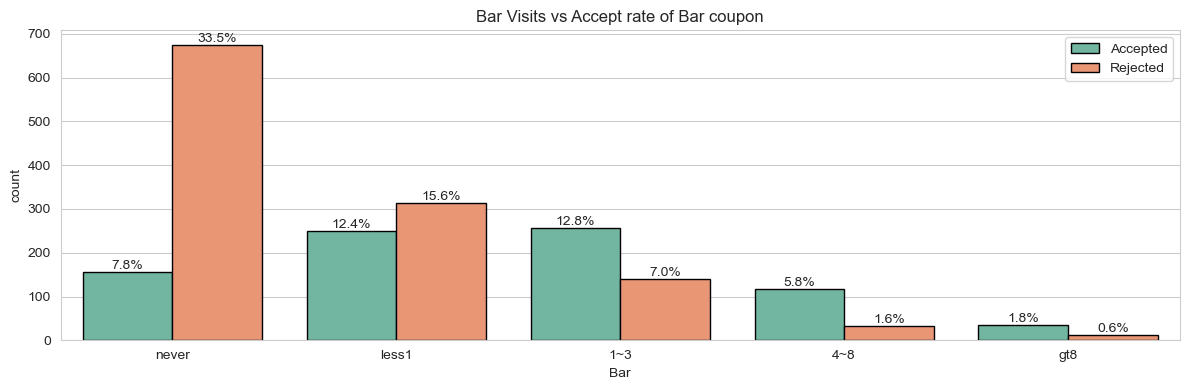

In [97]:
# Bar visits vs Accept rate for only bar coupon
plt.figure(figsize=(12,4))
ax1 = sns.countplot(data=df[df['coupon'] == "Bar"],x='Bar', hue='Accept(Y/N?)', hue_order=[1,0],
                   order=['never', 'less1', '1~3', '4~8', 'gt8'], edgecolor='black')
total = len(df[df['coupon'] == "Bar"])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/total*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Bar Visits vs Accept rate of Bar coupon')
plt.legend(['Accepted', 'Rejected'])
plt.tight_layout()
plt.show()

__Observations:__
* user who never visited bar or less than 1 have high rejection aratio.
* people who are more frequent to bar have high acceptance ratio.
* bar coupon acceptance ratio is increasing as visits are increasing.


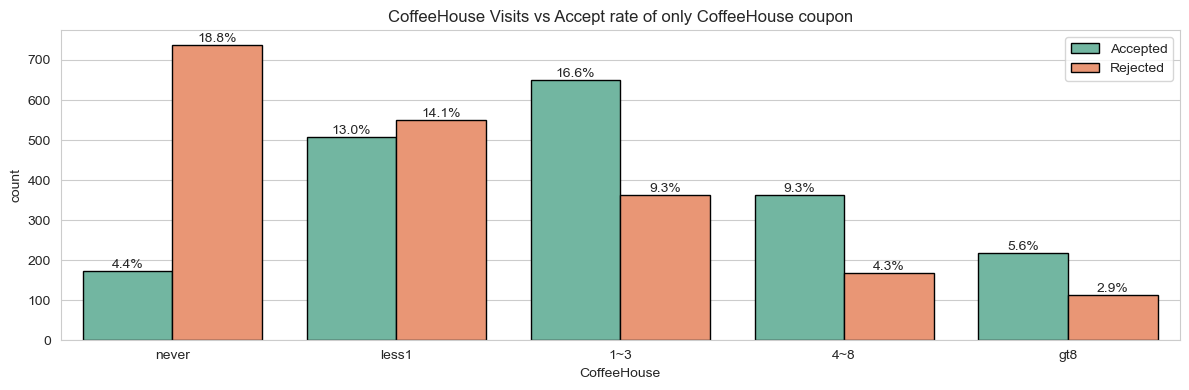

In [98]:
# CoffeeHouse visits vs Accept rate for only CoffeeHouse coupon
plt.figure(figsize=(12,4))
ax1 = sns.countplot(data=df[df['coupon'] == "Coffee House"],x='CoffeeHouse', hue='Accept(Y/N?)', hue_order=[1,0],
                   order=['never', 'less1', '1~3', '4~8', 'gt8'], edgecolor='black')
total = len(df[df['coupon'] == "Coffee House"])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/total*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('CoffeeHouse Visits vs Accept rate of only CoffeeHouse coupon')
plt.legend(['Accepted', 'Rejected'])
plt.tight_layout()
plt.show()

__Observations:__
* user who never visited Coffe House or less than 1 have high rejection ratio.
* people who are more frequent to Coffe house have high acceptance ratio.
* Coffe House coupon acceptance ratio is increasing as visits are increasing.



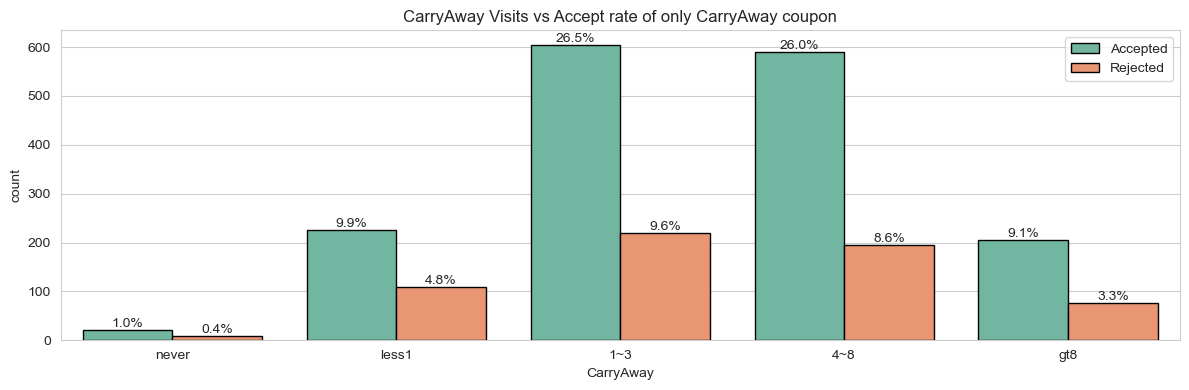

In [99]:
# CarryAway visits vs Accept rate for only CarryAway coupon
plt.figure(figsize=(12,4))
ax1 = sns.countplot(data=df[df['coupon'] == "Carry out & Take away"],x='CarryAway',edgecolor='black',
                    hue='Accept(Y/N?)', hue_order=[1,0], order=['never', 'less1', '1~3', '4~8', 'gt8'])
total = len(df[df['coupon'] == "Carry out & Take away"])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/total*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('CarryAway Visits vs Accept rate of only CarryAway coupon')
plt.legend(['Accepted', 'Rejected'])
plt.tight_layout()
plt.show()

__Observations:__
* Carry Away coupon have high acceptance ratio irrespective of visits.
* user who have visit frequency 1-3 and 4-8 have high acceptance raio.

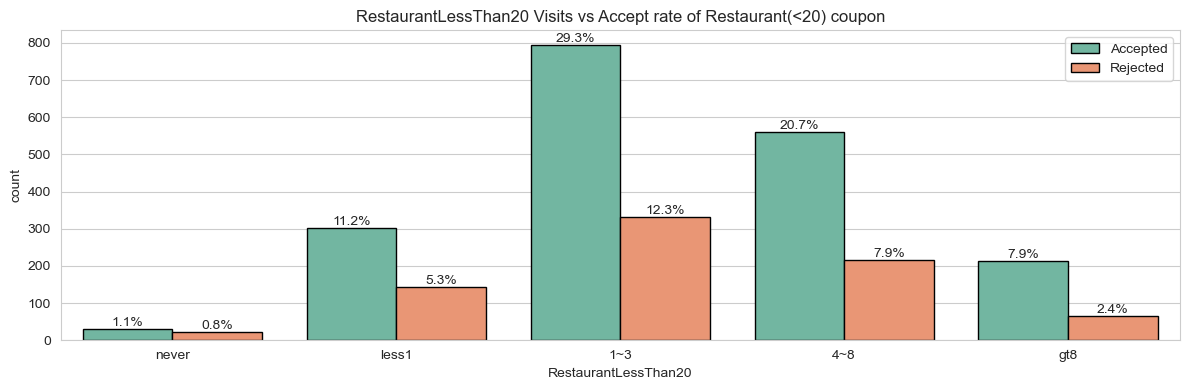

In [100]:
# RestaurantLessThan20 visits vs Accept rate for only Restaurant(<20) coupon
plt.figure(figsize=(12,4))
ax1 = sns.countplot(data=df[df['coupon'] == "Restaurant(<20)"],x='RestaurantLessThan20', hue='Accept(Y/N?)', hue_order=[1,0],
                    order=['never', 'less1', '1~3', '4~8', 'gt8'], edgecolor='black')

total = len(df[df['coupon'] == "Restaurant(<20)"])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/total*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('RestaurantLessThan20 Visits vs Accept rate of Restaurant(<20) coupon')
plt.legend(['Accepted', 'Rejected'])
plt.tight_layout()
plt.show()

__Observations:__
* RestaurantLessThan20 coupon acceptance ratio is increasing with respect to no. of visits.
* user who have visit frequency greater than 8 have high acceptance raio.
* user who have never visited have least acceptance ratio (50%).

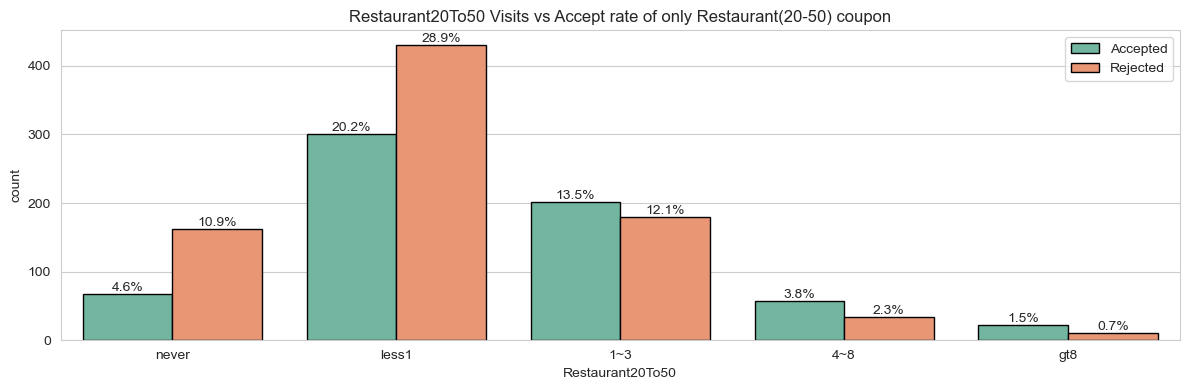

In [101]:
# Restaurant20To50 visits vs Accept rate for only Restaurant(20-50) coupon
plt.figure(figsize=(12,4))
ax1 = sns.countplot(data=df[df['coupon'] == "Restaurant(20-50)"],x='Restaurant20To50', hue='Accept(Y/N?)', hue_order=[1,0],
                   order=['never', 'less1', '1~3', '4~8', 'gt8'], edgecolor='black')
total = len(df[df['coupon'] == "Restaurant(20-50)"])

for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/total*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Restaurant20To50 Visits vs Accept rate of only Restaurant(20-50) coupon')
plt.legend(['Accepted', 'Rejected'])
plt.tight_layout()
plt.show()

__Observations:__
* Restaurant20to50 coupon acceptance ratio is increasing with respect to no. of visits.
* user who have visit frequency greater than 8 have high acceptance raio.
* user who have never visited have highest rejection ratio.

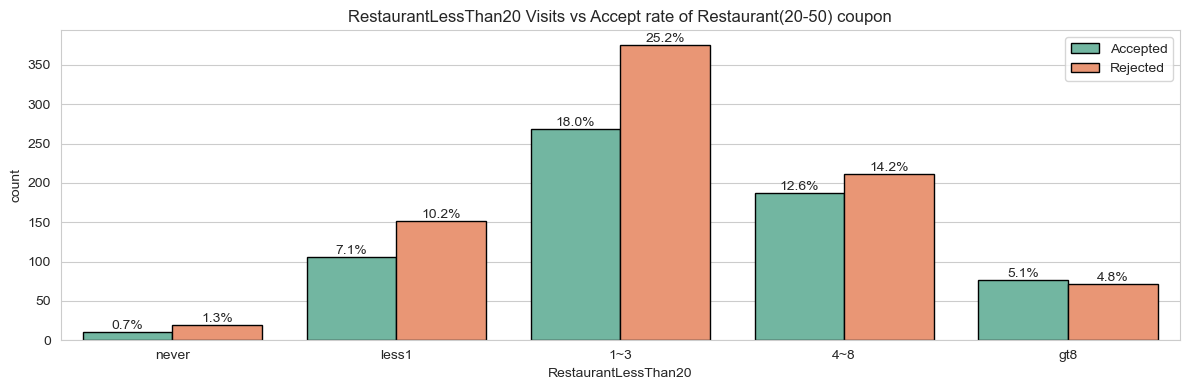

In [102]:
# RestaurantLessThan20 visits vs Accept rate for only Restaurant(20-50) coupon
plt.figure(figsize=(12,4))
ax1 = sns.countplot(data=df[df['coupon'] == "Restaurant(20-50)"],x='RestaurantLessThan20', hue='Accept(Y/N?)', hue_order=[1,0],
                    order=['never', 'less1', '1~3', '4~8', 'gt8'], edgecolor='black')
total = len(df[df['coupon'] == "Restaurant(20-50)"])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/total*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('RestaurantLessThan20 Visits vs Accept rate of Restaurant(20-50) coupon')
plt.legend(['Accepted', 'Rejected'])
plt.tight_layout()
plt.show()

__Observations:__
* people who are less frequent to low budget restaurant have high coupon rejection ratio for fancy restaurant.
* people who visits to low budget restaurant greatet than 8times in a month have 50% chance of accepting fancy restaurant coupon.

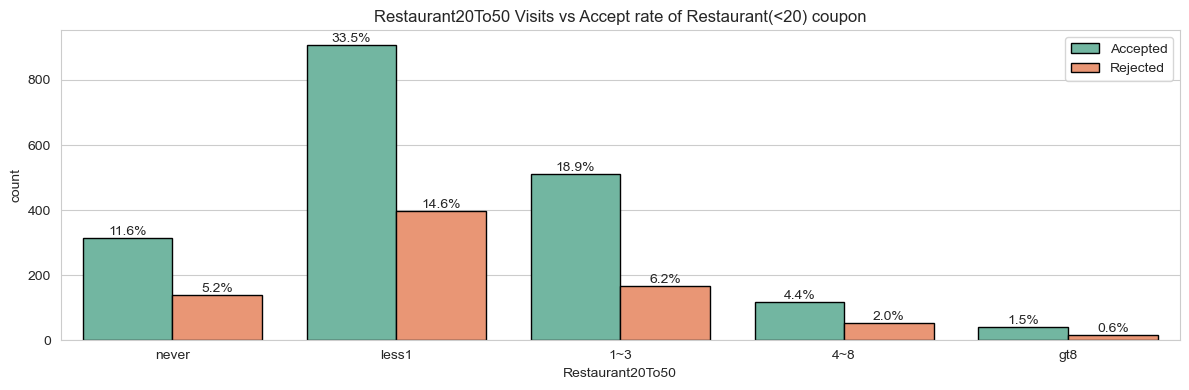

In [103]:
# Restaurant20To50 visits vs Accept rate for only Restaurant(<20) coupon
plt.figure(figsize=(12,4))
ax1 = sns.countplot(data=df[df['coupon'] == "Restaurant(<20)"],x='Restaurant20To50', hue='Accept(Y/N?)', hue_order=[1,0],
                   order=['never', 'less1', '1~3', '4~8', 'gt8'], edgecolor='black')
total = len(df[df['coupon'] == "Restaurant(<20)"])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/total*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Restaurant20To50 Visits vs Accept rate of Restaurant(<20) coupon')
plt.legend(['Accepted', 'Rejected'])
plt.tight_layout()
plt.show()

__Observations:__
* people who are less frequent to facny restaurant have high coupon acceptance ratio for low budget restaurant.
* people who visits fancy restaurant greater than 8times in a month have least accepting ratio for low budget restaurant coupon.
* people who visits fancy restaurant less than 1 time in month have highest acceptance ratio for low budget restaurant coupon

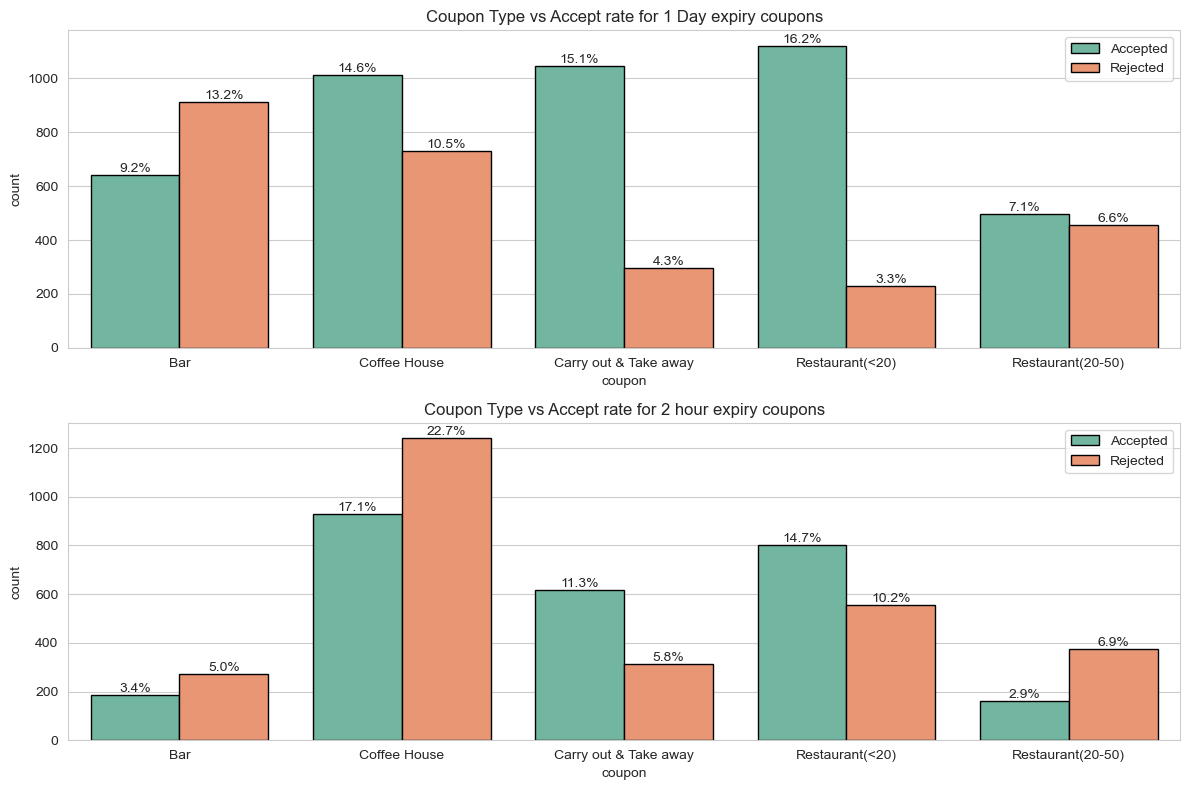

In [104]:
# Coupon type vs Accept rate for only 1d expriy COupon
plt.figure(figsize=(12,8))


plt.subplot(2,1,1)
ax1 = sns.countplot(data=df[df['expiration'] == "1d"],x='coupon', hue='Accept(Y/N?)', hue_order=[1,0], edgecolor='black',
                   order=['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)','Restaurant(20-50)'])
total = len(df[df['expiration'] == "1d"])

for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/total*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Coupon Type vs Accept rate for 1 Day expiry coupons')
plt.legend(['Accepted', 'Rejected'])

# Coupon type vs Accept rate for only 2h expriy COupon
plt.subplot(2,1,2)
ax1 = sns.countplot(data=df[df['expiration'] == "2h"],x='coupon', hue='Accept(Y/N?)', hue_order=[1,0], edgecolor='black',
                   order=['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)','Restaurant(20-50)'])

total = len(df[df['expiration'] == "2h"])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/total*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Coupon Type vs Accept rate for 2 hour expiry coupons')

plt.legend(['Accepted', 'Rejected'])
plt.tight_layout()
plt.show()

__Observations:__
* 1day expiry bar coupon has least acceptance ratio.
* 1day expiry coupon for Take away and Restaurant<20 has highest acceptance ratio.
* 1hour expiry coupon for Restaurant20to50 have highest rejection ratio.
* only Take away and Restaurant have high acceptance than rejection for 1hour coupon.

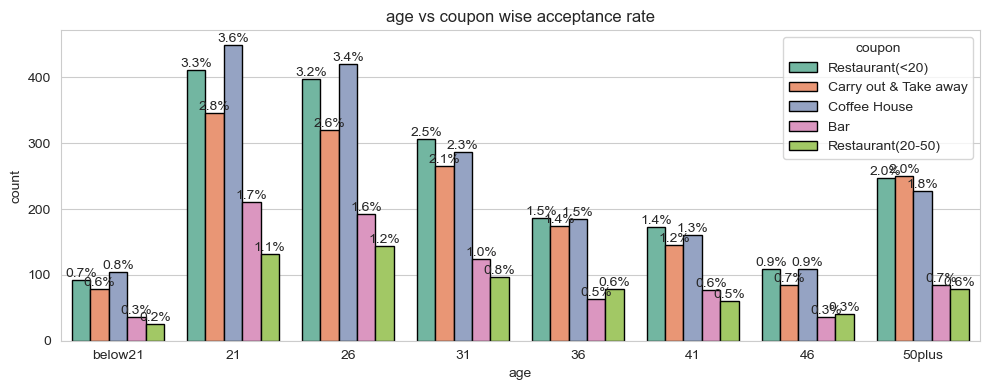

In [105]:
# age vs coupon wise acceptance rate
plt.figure(figsize=(10,4))

ax1 = sns.countplot(data=df[df['Accept(Y/N?)']==1], x='age', hue='coupon', edgecolor='black',
                    order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])


for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('age vs coupon wise acceptance rate')
plt.tight_layout()
plt.show()

### chi square test

In [106]:
# chi sqaure test 

matrix = pd.DataFrame(data=0,columns=df.columns, index=df.columns)

for row in df.columns:
    for col in df.columns:
        df_tab = pd.crosstab(df[row], df[col])
        # df_tab.head()

        from scipy.stats import chi2_contingency

        stats, p, dof, expected = chi2_contingency(df_tab, correction=False)

        if p < 0.05:
            
            matrix.loc[row, col] = 1
        else:
            matrix.loc[row, col] = 0

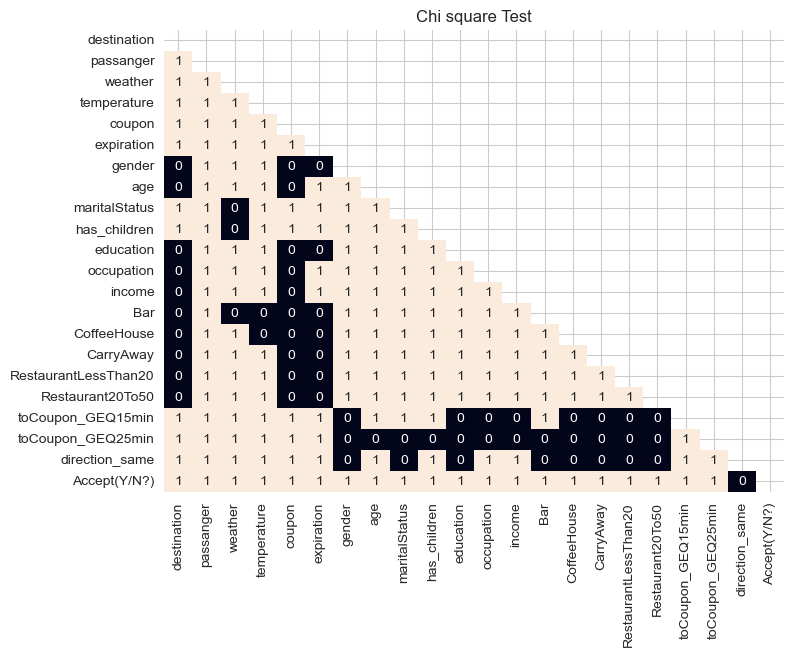

In [107]:
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, mask=mask,cbar=False)
plt.title('Chi square Test')
plt.show()

* feature 'direction_Same' has no signifance dependence withtarget variable.
Drop this feature.

In [108]:
df.drop(['direction_same'], axis=1, inplace=True)
df.shape

(12393, 21)

## Data Pre-Processing

### Train test Split

In [109]:
x = df.drop('Accept(Y/N?)', axis=1)
y = df['Accept(Y/N?)']

In [110]:
x.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0


In [111]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Accept(Y/N?), dtype: int64

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=101)

In [113]:
print(x_train.shape, y_train.shape)

(9294, 20) (9294,)


In [114]:
print(x_test.shape, y_test.shape)

(3099, 20) (3099,)


### Missing value Imputation

In [115]:
print('any missing value in x_train dataset? ', x_train.isnull().values.any())
print('any missing value in x_test dataset? ', x_test.isnull().values.any())

any missing value in x_train dataset?  True
any missing value in x_test dataset?  True


In [116]:
# missing values impuation

cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for col in cols:
    #training dataset
    x_train[col].fillna(x_train[col].value_counts().index[0], inplace=True)
    
    #test datset
    x_test[col].fillna(x_test[col].value_counts().index[0], inplace=True)
    
print('any missing value in x_train dataset? ', x_train.isnull().values.any())
print('any missing value in x_test dataset? ', x_test.isnull().values.any())

any missing value in x_train dataset?  False
any missing value in x_test dataset?  False


### Feature Engineering &  Extraction

##### 'occupation' feature

In [117]:
# feature 'occupation' has 25 distint nominal category, which will increase dimesnion after one hot encoding.

# training dataset

occupationType = []

for i in x_train.index:
    if x_train['occupation'][i] in ['Unemployed']:
        occupationType.append('Unemployed')
        
    elif x_train['occupation'][i] in ['Student']:
        occupationType.append('Student') 
        
    elif x_train['occupation'][i] in ['Retired']:
        occupationType.append('Retired')
    
    elif x_train['occupation'][i] in ['Architecture & Engineering', 'Education&Training&Library','Healthcare Practitioners & Technical',
                                 'Management', 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical', 
                                 'Office & Administrative Support', 'Legal', 'Business & Financial']:
        occupationType.append('Professional')
        
    elif x_train['occupation'][i] in ['Sales & Related', 'Personal Care & Service', 'Community & Social Services', 'Protective Service']:
        occupationType.append('Sales & Service')
        
    elif x_train['occupation'][i] in ['Life Physical Social Science', 'Healthcare Support', 'Construction & Extraction', 
                                 'Installation Maintenance & Repair', 'Transportation & Material Moving', 'Food Preparation & Serving Related',
                                'Production Occupations', 'Building & Grounds Cleaning & Maintenance', 'Farming Fishing & Forestry']:
        occupationType.append('Technician')
        

        
x_train['occupationType'] = occupationType

x_train['occupationType'].value_counts()



Professional       4120
Unemployed         1398
Sales & Service    1257
Student            1131
Technician         1031
Retired             357
Name: occupationType, dtype: int64

In [118]:
# test dataset

occupationType = []

for i in x_test.index:
    if x_test['occupation'][i] in ['Unemployed']:
        occupationType.append('Unemployed')
        
    elif x_test['occupation'][i] in ['Student']:
        occupationType.append('Student') 
        
    elif x_test['occupation'][i] in ['Retired']:
        occupationType.append('Retired')
    
    elif x_test['occupation'][i] in ['Architecture & Engineering', 'Education&Training&Library','Healthcare Practitioners & Technical',
                                 'Management', 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical', 
                                 'Office & Administrative Support', 'Legal', 'Business & Financial']:
        occupationType.append('Professional')
        
    elif x_test['occupation'][i] in ['Sales & Related', 'Personal Care & Service', 'Community & Social Services', 'Protective Service']:
        occupationType.append('Sales & Service')
        
    elif x_test['occupation'][i] in ['Life Physical Social Science', 'Healthcare Support', 'Construction & Extraction', 
                                 'Installation Maintenance & Repair', 'Transportation & Material Moving', 'Food Preparation & Serving Related',
                                'Production Occupations', 'Building & Grounds Cleaning & Maintenance', 'Farming Fishing & Forestry']:
        occupationType.append('Technician')
        

        
x_test['occupationType'] = occupationType

x_test['occupationType'].value_counts()

Professional       1378
Unemployed          430
Student             419
Sales & Service     389
Technician          351
Retired             132
Name: occupationType, dtype: int64

##### 'tocoupon' feature

In [119]:
# from eda analysis, we know features 'toCoupon_GEQ15min' and 'toCoupon_GEQ25min' are dependent on each other.
# merging these feature

# training dataset
x_train['tocoupon'] = x_train['toCoupon_GEQ15min'] + x_train['toCoupon_GEQ25min']

x_train['tocoupon'].value_counts()


1    4143
0    4044
2    1107
Name: tocoupon, dtype: int64

* 0 : estimated time to reach the place is less than 15min
* 1 : estimated time to reach the place is greater than 15min and less than 25min
* 2 : estimated time to reach the place is greater than 25min

In [120]:
# test dataset
x_test['tocoupon'] = x_test['toCoupon_GEQ15min'] + x_test['toCoupon_GEQ25min']

x_test['tocoupon'].value_counts()

1    1379
0    1364
2     356
Name: tocoupon, dtype: int64

##### coupon type wise place's visit frequency 

In [121]:
# from eda analysis, we know that coupon acceptance rate depends on coupon type and cutomer's visits to that place
# so instead of having 5 different palce's visit frequencies, we will take place frequencies only related to coupon type

# visit frequency features RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, Restaurant20To50
# feature coupon type : 'Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)'


CouponType_freq = []

# training dataset
for i in x_train.index:
    if x_train['coupon'][i] == 'Restaurant(<20)':
        CouponType_freq.append(x_train['RestaurantLessThan20'][i])
        
    elif x_train['coupon'][i] == 'Restaurant(20-50)':
        CouponType_freq.append(x_train['Restaurant20To50'][i])
        
    elif x_train['coupon'][i] == 'Coffee House':
        CouponType_freq.append(x_train['CoffeeHouse'][i])
        
    elif x_train['coupon'][i] == 'Carry out & Take away':
        CouponType_freq.append(x_train['CarryAway'][i])
        
    elif x_train['coupon'][i] == 'Bar':
        CouponType_freq.append(x_train['Bar'][i])

x_train['CouponType_freq'] =CouponType_freq

x_train['CouponType_freq'].value_counts()

1~3      2845
less1    2395
4~8      1763
never    1571
gt8       720
Name: CouponType_freq, dtype: int64

In [122]:
# test dataset

CouponType_freq = []

for i in x_test.index:
    if x_test['coupon'][i] == 'Restaurant(<20)':
        CouponType_freq.append(x_test['RestaurantLessThan20'][i])
        
    elif x_test['coupon'][i] == 'Restaurant(20-50)':
        CouponType_freq.append(x_test['Restaurant20To50'][i])
        
    elif x_test['coupon'][i] == 'Coffee House':
        CouponType_freq.append(x_test['CoffeeHouse'][i])
        
    elif x_test['coupon'][i] == 'Carry out & Take away':
        CouponType_freq.append(x_test['CarryAway'][i])
        
    elif x_test['coupon'][i] == 'Bar':
        CouponType_freq.append(x_test['Bar'][i])

x_test['CouponType_freq'] =CouponType_freq

x_test['CouponType_freq'].value_counts()

1~3      941
less1    832
4~8      570
never    503
gt8      253
Name: CouponType_freq, dtype: int64

##### waeather temperature feature

In [123]:
# Merge weather and temperature feature

#training dataset
x_train['WeatherTemp'] = x_train['weather'] + ' ' + x_train['temperature'].apply(str) + 'F'

# test dataset
x_test['WeatherTemp'] = x_test['weather'] + ' ' + x_test['temperature'].apply(str) + 'F'

In [124]:
# drop unrequried columns

col = ['occupation', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',  'RestaurantLessThan20', 'CoffeeHouse', 'CarryAway', 'Bar', 
       'Restaurant20To50', 'weather', 'temperature', ]

#train dataset
x_train.drop(col, axis=1, inplace=True)

#test dataset
x_test.drop(col, axis=1, inplace=True)

In [125]:
x_train.columns

Index(['destination', 'passanger', 'coupon', 'expiration', 'gender', 'age',
       'maritalStatus', 'has_children', 'education', 'income',
       'occupationType', 'tocoupon', 'CouponType_freq', 'WeatherTemp'],
      dtype='object')

In [126]:
x_test.columns

Index(['destination', 'passanger', 'coupon', 'expiration', 'gender', 'age',
       'maritalStatus', 'has_children', 'education', 'income',
       'occupationType', 'tocoupon', 'CouponType_freq', 'WeatherTemp'],
      dtype='object')

In [127]:
x_train.head()

,destination,passanger,coupon,expiration,gender,age,maritalStatus,has_children,education,income,occupationType,tocoupon,CouponType_freq,WeatherTemp
3144,No Urgent Place,Friend(s),Coffee House,2h,Male,41,Married partner,1,Graduate degree (Masters or Doctorate),$62500 - $74999,Professional,0,1~3,Sunny 80F
331,No Urgent Place,Partner,Restaurant(20-50),1d,Female,21,Unmarried partner,0,Associates degree,$75000 - $87499,Student,0,less1,Sunny 80F
3963,No Urgent Place,Friend(s),Restaurant(<20),2h,Female,21,Single,0,Bachelors degree,$12500 - $24999,Professional,1,1~3,Sunny 80F
6341,Work,Alone,Restaurant(20-50),2h,Female,36,Divorced,1,Graduate degree (Masters or Doctorate),$12500 - $24999,Student,1,1~3,Sunny 80F
6518,No Urgent Place,Friend(s),Coffee House,2h,Male,below21,Single,0,Some college - no degree,Less than $12500,Student,1,4~8,Sunny 80F


###  Encoding

In [128]:
# mapping 'age' feature values

age_map = {'21':21, '26':26, '31':31, '50plus':50, '36':36, '41':41, '46':46, 'below21':20}

# training dataset
x_train['age'] = x_train['age'].map(age_map)

#test dataset
x_test['age'] = x_test['age'].map(age_map)

x_test['age'].value_counts()

21    663
26    641
31    478
50    424
36    299
41    269
46    174
20    151
Name: age, dtype: int64

In [129]:
# mapping income feature values

income_map = {'$25000 - $37499':31250, '$12500 - $24999':18750, '$37500 - $49999':43750, '$100000 or More': 100000, 
              '$50000 - $62499':56250, 'Less than $12500':12500, '$87500 - $99999':93750, '$75000 - $87499':81250, 
              '$62500 - $74999':68750}

# traning dataset
x_train['income'] = x_train['income'].map(income_map)

# test dataset
x_test['income'] = x_test['income'].map(income_map)

x_test['income'].value_counts()

31250     517
18750     452
43750     421
56250     414
100000    408
12500     267
93750     212
68750     207
81250     201
Name: income, dtype: int64

In [130]:
# mapping CouponType_freq feature

freq_map = {'never':0, 'less1':1, '1~3':2, '4~8':6, 'gt8':9}

# training datset
x_train['CouponType_freq'] = x_train['CouponType_freq'].map(freq_map)

# test datset
x_test['CouponType_freq'] = x_test['CouponType_freq'].map(freq_map)

x_test['CouponType_freq'].value_counts()

2    941
1    832
6    570
0    503
9    253
Name: CouponType_freq, dtype: int64

In [131]:
# gender feature encoding

# training datset
x_train['gender'] = x_train['gender'].map({'Male':1, 'Female':0})

#test datset
x_test['gender'] = x_test['gender'].map({'Male':1, 'Female':0})

x_test['gender'].value_counts()

0    1603
1    1496
Name: gender, dtype: int64

In [132]:
# expiration feature encoding

# training datset
x_train['expiration'] = x_train['expiration'].map({'1d':1, '2h':0})

#test datset
x_test['expiration'] = x_test['expiration'].map({'1d':1, '2h':0})

x_test['expiration'].value_counts()

1    1729
0    1370
Name: expiration, dtype: int64

In [133]:
# 'education' feature mapping

edu_map = {'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3,
           'Bachelors degree': 4,'Graduate degree (Masters or Doctorate)': 5}

# training datset
x_train['education'] = x_train['education'].map(edu_map)

#test datset
x_test['education'] = x_test['education'].map(edu_map)

x_test['education'].value_counts()

4    1071
2    1055
5     449
3     260
1     240
0      24
Name: education, dtype: int64

In [134]:
# one hot encoding

col = ['destination', 'passanger', 'coupon', 'maritalStatus', 'occupationType', 'WeatherTemp']

x_train = pd.get_dummies(data=x_train, columns=col)

x_test = pd.get_dummies(data=x_test, columns=col)

In [135]:
x_train.shape

(9294, 36)

### Feature Scaling

In [136]:
sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

# Model building

## Logistic regression

In [137]:
lr = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', random_state=101) #default parameter

lr.fit(x_train_sc, y_train)

y_train_pred_lr = lr.predict(x_train_sc)
y_test_pred_lr = lr.predict(x_test_sc)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_lr))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_lr ))
      

Train dataset report :
               precision    recall  f1-score   support

           0       0.65      0.60      0.62      4036
           1       0.71      0.75      0.73      5258

    accuracy                           0.68      9294
   macro avg       0.68      0.67      0.68      9294
weighted avg       0.68      0.68      0.68      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      1345
           1       0.70      0.75      0.73      1754

    accuracy                           0.68      3099
   macro avg       0.67      0.67      0.67      3099
weighted avg       0.68      0.68      0.68      3099



<Figure size 100x100 with 0 Axes>

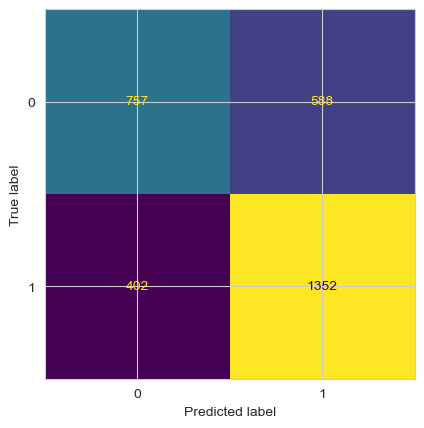

In [140]:
plt.figure(figsize=(1,1))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_lr, cmap='viridis',colorbar=False)
plt.show()

## K Nearest Neighbour

In [141]:
knn = KNeighborsClassifier(n_neighbors=5 )

knn.fit(x_train_sc, y_train)

y_train_pred_knn = knn.predict(x_train_sc)
y_test_pred_knn = knn.predict(x_test_sc)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_knn))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_knn ))

Train dataset report :
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      4036
           1       0.78      0.83      0.80      5258

    accuracy                           0.77      9294
   macro avg       0.77      0.76      0.77      9294
weighted avg       0.77      0.77      0.77      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.62      0.57      0.59      1345
           1       0.69      0.73      0.71      1754

    accuracy                           0.66      3099
   macro avg       0.65      0.65      0.65      3099
weighted avg       0.66      0.66      0.66      3099



Text(0.5, 0, 'K value')

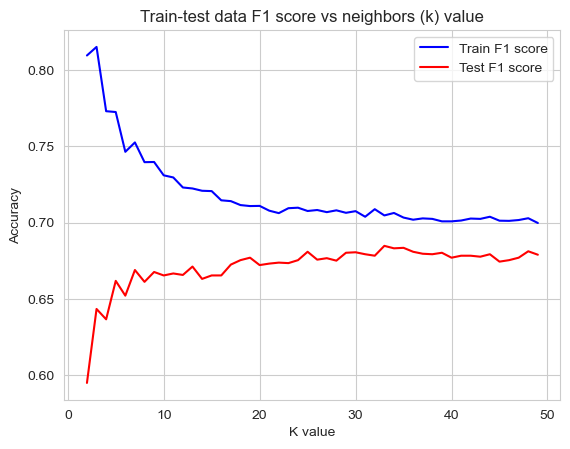

In [142]:
# find best value of k
accu_test = []
accu_train = []
for i in range(2,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_sc, y_train)
    
    accu_train.append(accuracy_score(y_train, knn.predict(x_train_sc)))
    accu_test.append(accuracy_score(y_test, knn.predict(x_test_sc)))
    
plt.plot(range(2,50), accu_train, c='blue', label = 'Train F1 score')
plt.plot(range(2,50), accu_test, c='red', label = 'Test F1 score')
plt.title('Train-test data F1 score vs neighbors (k) value')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('K value')

In [144]:
# Best k=30

knn = KNeighborsClassifier(n_neighbors=30, p=1, weights='uniform' )

knn.fit(x_train_sc, y_train)

y_train_pred_knn = knn.predict(x_train_sc)
y_test_pred_knn = knn.predict(x_test_sc)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_knn))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_knn ))

Train dataset report :
               precision    recall  f1-score   support

           0       0.70      0.60      0.65      4036
           1       0.73      0.80      0.76      5258

    accuracy                           0.72      9294
   macro avg       0.71      0.70      0.71      9294
weighted avg       0.71      0.72      0.71      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.67      0.54      0.60      1345
           1       0.69      0.80      0.74      1754

    accuracy                           0.69      3099
   macro avg       0.68      0.67      0.67      3099
weighted avg       0.68      0.69      0.68      3099



* test data accuracy and f1 score improved with tuned parameters.

<Figure size 100x100 with 0 Axes>

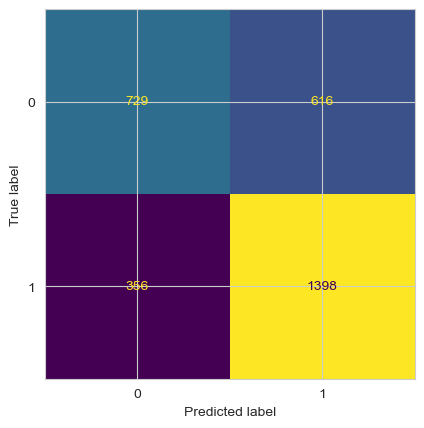

In [145]:
plt.figure(figsize=(1,1))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_knn, cmap='viridis',colorbar=False)
plt.show()

## Support Vector Machine

In [146]:
svm = SVC(C=1.0, kernel='rbf', gamma='scale')  #default parameter

svm.fit(x_train_sc, y_train)


y_train_pred_svm = svm.predict(x_train_sc)
y_test_pred_svm = svm.predict(x_test_sc)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_svm))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_svm))

Train dataset report :
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      4036
           1       0.77      0.83      0.80      5258

    accuracy                           0.76      9294
   macro avg       0.76      0.75      0.75      9294
weighted avg       0.76      0.76      0.76      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.68      0.59      0.63      1345
           1       0.72      0.79      0.75      1754

    accuracy                           0.70      3099
   macro avg       0.70      0.69      0.69      3099
weighted avg       0.70      0.70      0.70      3099



<Figure size 600x600 with 0 Axes>

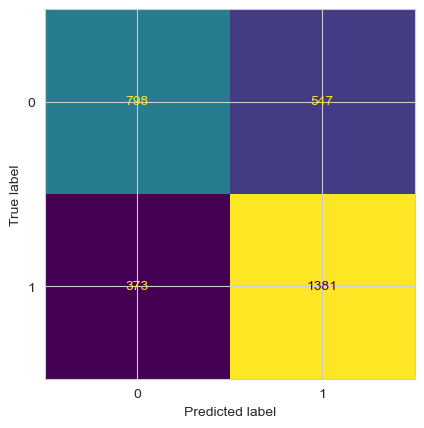

In [149]:
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svm, cmap='viridis',colorbar=False)
plt.show()


## Naive Bayes

In [150]:
# Naive Bayes assumes every features are independent of each other.

nb = GaussianNB()
nb.fit(x_train, y_train)

y_train_pred_nb = nb.predict(x_train)
y_test_pred_nb = nb.predict(x_test)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_nb))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_nb))

Train dataset report :
               precision    recall  f1-score   support

           0       0.65      0.56      0.60      4036
           1       0.70      0.76      0.73      5258

    accuracy                           0.68      9294
   macro avg       0.67      0.66      0.67      9294
weighted avg       0.67      0.68      0.67      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.65      0.55      0.59      1345
           1       0.69      0.77      0.73      1754

    accuracy                           0.68      3099
   macro avg       0.67      0.66      0.66      3099
weighted avg       0.67      0.68      0.67      3099



<Figure size 600x600 with 0 Axes>

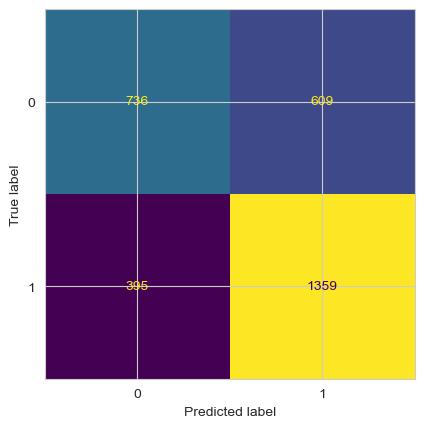

In [151]:
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_nb, cmap='viridis',colorbar=False)
plt.show()


## Decision Tree

In [152]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train, y_train)

y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_dt))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_dt))

Train dataset report :
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      4036
           1       1.00      0.98      0.99      5258

    accuracy                           0.99      9294
   macro avg       0.99      0.99      0.99      9294
weighted avg       0.99      0.99      0.99      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.61      0.66      0.63      1345
           1       0.72      0.68      0.70      1754

    accuracy                           0.67      3099
   macro avg       0.66      0.67      0.67      3099
weighted avg       0.67      0.67      0.67      3099



* this model has high variance.

<Figure size 600x600 with 0 Axes>

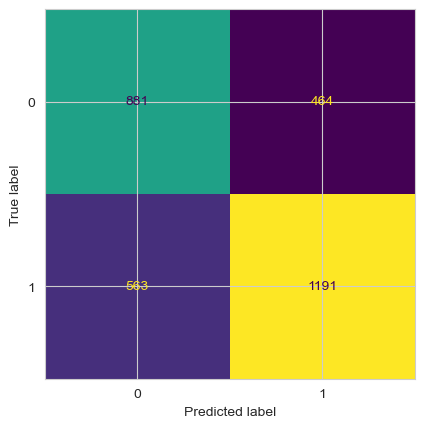

In [153]:
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_dt, cmap='viridis',colorbar=False)
plt.show()

## Random Forest

In [156]:
rf = RandomForestClassifier(random_state=42)

rf.fit(x_train, y_train)

y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_rf))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_rf))

Train dataset report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4036
           1       0.99      0.99      0.99      5258

    accuracy                           0.99      9294
   macro avg       0.99      0.99      0.99      9294
weighted avg       0.99      0.99      0.99      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.70      0.64      0.67      1345
           1       0.74      0.79      0.76      1754

    accuracy                           0.72      3099
   macro avg       0.72      0.71      0.71      3099
weighted avg       0.72      0.72      0.72      3099



* model has high variance.

<Figure size 600x600 with 0 Axes>

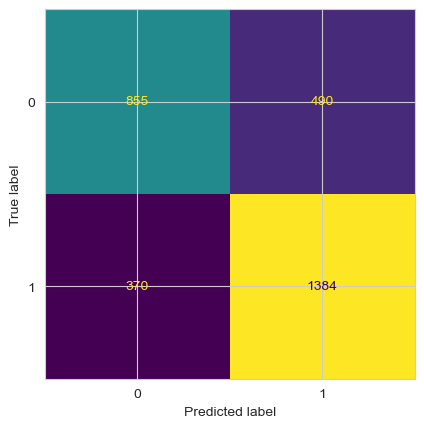

In [158]:
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rf, cmap='viridis',colorbar=False)
plt.show()

## Gradient Boost

In [159]:
gbm = GradientBoostingClassifier(random_state=42)

gbm.fit(x_train, y_train)

y_train_pred_gbm = gbm.predict(x_train)
y_test_pred_gbm = gbm.predict(x_test)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_gbm))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_gbm))

Train dataset report :
               precision    recall  f1-score   support

           0       0.73      0.61      0.67      4036
           1       0.74      0.83      0.78      5258

    accuracy                           0.73      9294
   macro avg       0.73      0.72      0.72      9294
weighted avg       0.73      0.73      0.73      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.71      0.57      0.64      1345
           1       0.72      0.82      0.77      1754

    accuracy                           0.71      3099
   macro avg       0.71      0.70      0.70      3099
weighted avg       0.71      0.71      0.71      3099



<Figure size 600x600 with 0 Axes>

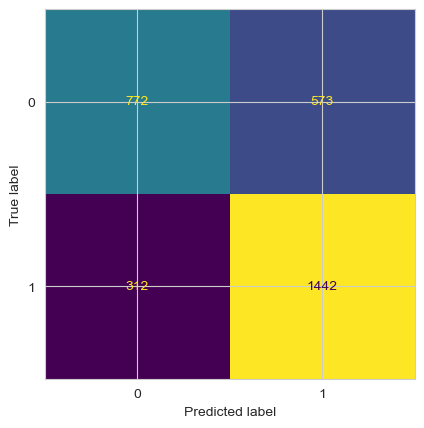

In [162]:
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gbm, cmap='viridis',colorbar=False)
plt.show()

## Stacking Classifier

In [163]:
models = [('KNN', KNeighborsClassifier()),
         ('SVM', SVC()),
         ('Naive Bayes', GaussianNB()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boost', GradientBoostingClassifier())]

stack_clf = StackingClassifier(estimators=models, final_estimator=LogisticRegression(), cv=5)
          
stack_clf.fit(x_train_sc, y_train)
          
y_train_pred_stk = stack_clf.predict(x_train)
y_test_pred_stk = stack_clf.predict(x_test_sc)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_stk))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_stk))
          

Train dataset report :
               precision    recall  f1-score   support

           0       0.73      0.20      0.31      4036
           1       0.60      0.94      0.74      5258

    accuracy                           0.62      9294
   macro avg       0.67      0.57      0.52      9294
weighted avg       0.66      0.62      0.55      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.72      0.61      0.66      1345
           1       0.73      0.82      0.77      1754

    accuracy                           0.73      3099
   macro avg       0.73      0.71      0.72      3099
weighted avg       0.73      0.73      0.72      3099



<Figure size 600x600 with 0 Axes>

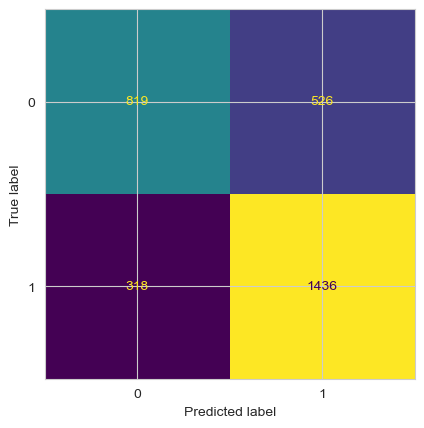

In [164]:
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_stk, cmap='viridis',colorbar=False)
plt.show()

# AUC ROC Curve

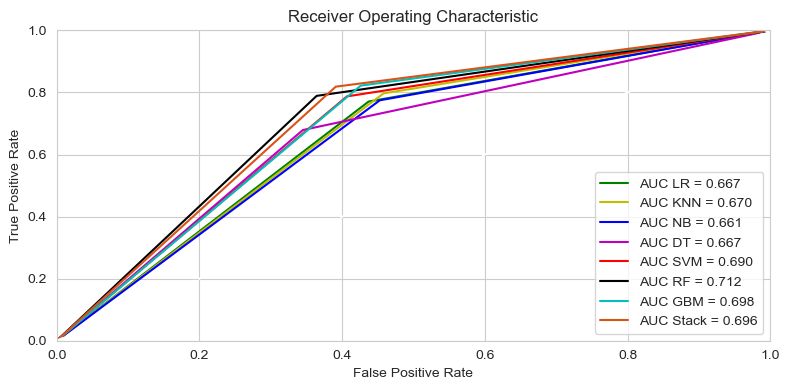

In [165]:
# logistic regression model
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_test_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# KNN model
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, y_test_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
 
# Naive Bayes Model
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_test_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# SVM Model
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_test_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Decision Tree Model
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_test_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random forest  Model
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_test_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Gradient Boosting Model
fpr_gbm, tpr_gbm, threshold_gbm = roc_curve(y_test, y_test_pred_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# stacking classifier Model
fpr_stk, tpr_stk, threshold_stk = roc_curve(y_test, y_test_pred_stk)
roc_auc_stk = auc(fpr_gbm, tpr_stk)


fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'g', label = f'AUC LR = {roc_auc_lr:.3f}')
plt.plot(fpr_knn, tpr_knn, 'y', label = f'AUC KNN = {roc_auc_knn:.3f}')
plt.plot(fpr_nb, tpr_nb, 'b', label = f'AUC NB = {roc_auc_nb:.3f}')
plt.plot(fpr_dt, tpr_dt, 'm', label = f'AUC DT = {roc_auc_dt:.3f}')
plt.plot(fpr_svm, tpr_svm, 'r', label = f'AUC SVM = {roc_auc_svm:.3f}')
plt.plot(fpr_rf, tpr_rf, 'k', label = f'AUC RF = {roc_auc_rf:.3f}')
plt.plot(fpr_gbm, tpr_gbm, 'c', label = f'AUC GBM = {roc_auc_gbm:.3f}')
plt.plot(fpr_stk, tpr_stk, '#D95319', label = f'AUC Stack = {roc_auc_stk:.3f}')



plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

# Model Result

Here are the classification performance measures for the 7 different classification modelss tested: 

| Classifier | Accuracy | F1-Score | Precision | Recall |
|:-----------|:---------|:---------|:----------|:-------|
|Logistic Regression|0.68|0.73|0.70|0.75|
|KNN|0.69|0.74|0.69|0.80|
|Naive Bayes |0.68|0.73|0.69|0.77
|SVM|0.7|0.75|0.72|0.79|
|Decision Tree|0.67|0.70|0.72|0.68|
|Random Forest|0.72|0.76|0.77|0.79|
|Gradient Boost|0.71|0.77|0.72|0.82|
|Stacking Classifier|0.73|0.77|0.73|0.82

Random forest has highest auc score and have high precision value.

# Hyperparameter tuning

In [166]:
# hyperparameter tuning

rfm_param_grid = {'n_estimators': [10,100,500,1000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50],
                  'min_samples_split': [10,20,50,100],
                  'min_samples_leaf': [5,10,25,50]} 

rfm_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                        rfm_param_grid,
                        refit=True, cv=5, verbose=2)

rfm_grid.fit(x_train, y_train)

rfm_grid.best_params_

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimato

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   4.3s
[CV] END max_depth=10, 

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1000; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1000; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1000; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1000; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=1

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=25, min_samples_split=50, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=1000; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=1000; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=1000; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=1000; total time=   4.2s
[CV] END max_depth=1

[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   4.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END max_depth=10, m

[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   3.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_dept

[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=500; total time=   1.9s
[CV] END max_dept

[CV] END max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=1000; total time=   3.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=1000; total time=   3.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=1000; total time=   3.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=1000; total time=   3.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=1000; total time=   3.9s
[CV] END max_depth=

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=500; total time=   2.4s
[CV] END max_depth=20, max_feature

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=500; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=500; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=500; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=500; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=   5.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=   5.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=   5.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=   5.2s
[CV] END max_depth=2

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=1000; total time=   4.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=1000; total time=   4.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, m

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000; total time=   4.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_dept

[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, ma

[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=500; total time=   2.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=500; total time=   2.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=500; total time=   2.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000; total time=   4.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000; total time=   4.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000; total time=   4.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000; total time=   4.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000; total time=   4.3s
[CV] END max_depth=

[CV] END max_depth=20, max_features=log2, min_samples_leaf=25, min_samples_split=20, n_estimators=1000; total time=   4.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_f

[CV] END max_depth=20, max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=500; total time=   1.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, m

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   5.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   5.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   5.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   5.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   5.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_fea

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.5s
[CV] END max_depth=30, max

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   4.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   4.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   4.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   4.3s
[CV] END max

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=25, min_samples_split=50, n_estimators=1000; total time=   4.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=30

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, m

[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time=   5.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time=   5.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time=   5.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time=   4.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time=   4.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_fea

[CV] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=500; total time=   2.3s
[CV] END max_depth=30, max

[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=1000; total time=   4.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=1000; total time=   4.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=1000; total time=   4.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=10, n_estimators=1000; total time=   4.2s
[CV] END max_depth=3

[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=25, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, ma

[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=500; total time=   1.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=500; total time=   1.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=500; total time=   1.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=500; total time=   1.8s
[CV] END max_dep

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=500; total time=   2.3s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   4.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   4.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   4.6s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   4.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   4.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500; total time=   2.3s
[CV] END max_depth=40, max

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=500; total time=   2.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=500; total time=   2.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=500; total time=   2.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=500; total time=   2.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=1000; total time=   4.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=1000; total time=   4.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=1000; total time=   4.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=25, min_samples_split=20, n_estimators=1000; total time=   4.4s
[CV] END max_depth=4

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=1000; total time=   4.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=1000; total time=   3.9s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, max_

[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.6s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.7s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.7s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.9s
[CV] END max_depth=40, max_featu

[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   4.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   4.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   4.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=40

[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.9s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_dept

[CV] END max_depth=40, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=500; total time=   2.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=500; total time=   2.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=500; total time=   2.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=1000; total time=   4.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=1000; total time=   4.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=1000; total time=   4.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=1000; total time=   4.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=25, min_samples_split=50, n_estimators=1000; total time=   4.1s
[CV] END max_depth=

[CV] END max_depth=40, max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=1000; total time=   3.8s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, max_f

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=500; total time=   2.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=500; total time=   2.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=500; total time=   2.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=500; total time=   2.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=500; total time=   2.7s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   5.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   5.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   5.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   5.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   5.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=50,

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END max_depth=50, max

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=500; total time=   2.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=500; total time=   2.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=1000; total time=   4.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=1000; total time=   4.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=1000; total time=   4.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=25, min_samples_split=100, n_estimators=1000; total time=   4.2s
[CV] END max

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=1000; total time=   4.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=50

[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=500; total time=   2.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=500; total time=   2.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=500; total time=   2.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=500; total time=   2.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=500; total time=   2.1s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=   4.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=   4.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=   4.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=   4.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=   4.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=10; total time=   0.0s
[CV] END max_depth=50,

[CV] END max_depth=50, max_features=log2, min_samples_leaf=25, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=25, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=25, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=25, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=25, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=25, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=25, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=25, min_samples_split=20, n_estimators=500; total time=   2.0s
[CV] END max_depth=50, max

[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=1000; total time=   3.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=1000; total time=   3.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END max_depth=5

[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=1000; total time=   3.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=1000; total time=   3.7s


{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 500}

In [182]:
rf = RandomForestClassifier(n_estimators= 500, max_depth= 20, max_features= 'log2', min_samples_leaf= 5, 
                            min_samples_split= 20)
rf.fit(x_train, y_train)

y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

print('Train dataset report :\n', classification_report(y_train, y_train_pred_rf))
print('#'*80)
print('Test dataset report :\n', classification_report(y_test, y_test_pred_rf))

Train dataset report :
               precision    recall  f1-score   support

           0       0.80      0.67      0.73      4036
           1       0.77      0.87      0.82      5258

    accuracy                           0.78      9294
   macro avg       0.78      0.77      0.77      9294
weighted avg       0.78      0.78      0.78      9294

################################################################################
Test dataset report :
               precision    recall  f1-score   support

           0       0.72      0.58      0.64      1345
           1       0.72      0.83      0.77      1754

    accuracy                           0.72      3099
   macro avg       0.72      0.70      0.70      3099
weighted avg       0.72      0.72      0.71      3099



In [187]:
# after hypertuning, variance is reduced and recall score increased.

<Figure size 600x600 with 0 Axes>

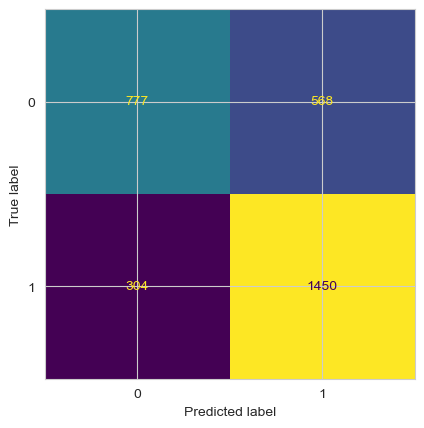

In [183]:
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rf, cmap='viridis',colorbar=False)
plt.show()

# Feature Importance

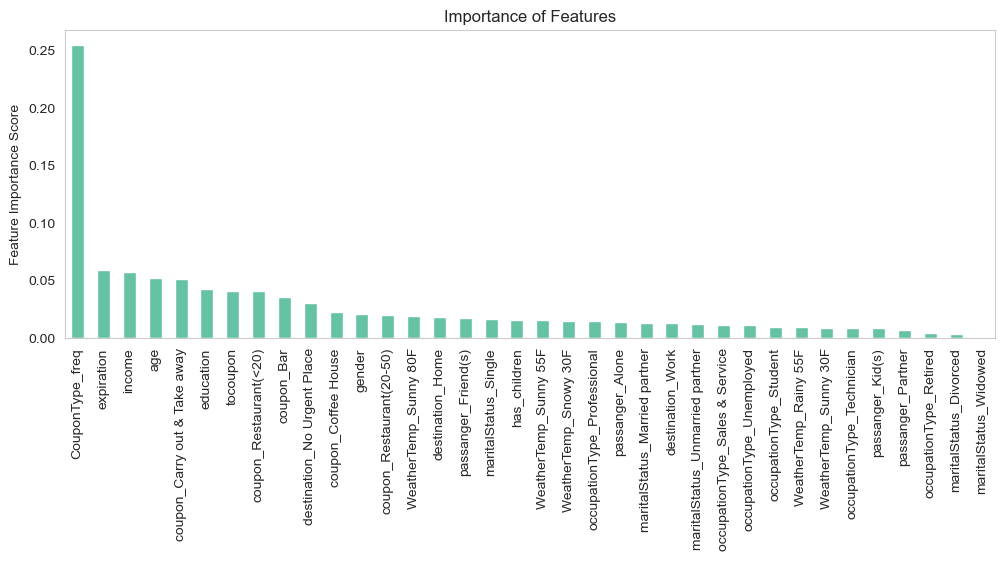

In [184]:
feat_imp = pd.Series(rf.feature_importances_, rf.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()